# Final Project Submission

Please fill out:
* Student name: Sumaiya Abdullahi Osman, Bernice Kutwa, David Masai, Kennedy Kariuki, Raniel Musyoki, Kelvin Nyawira, and Joseph Nderitu
* Student pace: full time
* Scheduled project review date/time: 20/01/2025
* Instructor name: William Okomba


# Project Overview
In this project, we aim to conduct exploratory data analysis (EDA) to provide actionable insights that will guide a newly established movie studio in selecting the most profitable types of films to create. With the rise of original content creation by leading companies, our goal is to help the new studio identify the best strategies for producing films that will maximize box office revenue. We will analyze various datasets to uncover trends related to genre performance, budget efficiency, casting success, and release timing. The end result will be a set of concrete business recommendations, which will inform the studio's decisions about what types of films to produce, how to allocate resources, and when to release content.

# Business Understanding
The business problem facing the new movie studio is that, in a highly competitive film industry, they must make strategic decisions on what types of films to produce in order to successfully enter the market. With well-established companies already producing original content, the new studio needs to identify profitable film types to ensure commercial success.
In addition to identifying which films are performing the best, the studio has further business problems to address:
#### Minimizing Risks: 
The studio must understand the aspects of movie production that most frequently lead to losses. This includes analyzing the factors that contribute to financial success or failure, such as genre, budget, and cast.

#### Gaining a Competitive Advantage: 
With many large players already dominating the industry, the studio needs to differentiate itself. The challenge is identifying unique strategies that will enable them to stand out in a crowded market.

#### Understanding Audience Preferences:
What factors drive audience interest? How do genre, casting, or movie ratings affect a film’s reception? The studio needs to understand how these factors influence box office performance to ensure that the movies resonate with their target audience.

The goal is to provide three concrete, actionable insights for the studio to maximize its box office revenue while minimizing financial risks and gaining a competitive edge. These insights should guide decisions regarding movie genre, budget allocation, cast selection, and strategic release timing.



# Objectives

1. Identify high-performing movie genres by analyzing their relationship with box office performance.

# Data Understanding
The data for this analysis comes from multiple movie industry sources, including Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB, and The Numbers. These datasets provide rich insights into various aspects of movie performance, including:

#### Box Office Revenue: 
- The key metric for evaluating the financial success of a movie, and the primary focus of our analysis.
Production Budgets: Understanding how the budget affects box office revenue is essential for determining the optimal budget allocation for future films.
#### Genres:
- Movie genres play a significant role in audience engagement and box office performance. We will explore which genres tend to produce the highest returns.
#### Cast and Crew:
- Data on actors, directors, and writers will help us assess how key personnel influence a film’s financial success.
#### Release Dates:
- The time of year when a movie is released can have a major impact on its performance. We will investigate seasonal patterns to help the studio plan its release schedule effectively.

The data is stored in various formats, such as compressed CSV, TSV files, and an SQLite database from IMDB. Each dataset provides different views of the movie industry landscape, and our task is to synthesize these to derive meaningful insights. We will use exploratory analysis to uncover correlations, trends, and patterns that can inform the studio’s decision-making.

# Data Preparation/ Cleaning

# Steps to Be Performed:

### Cleaning the Data:

1. Handle Missing Values: Identify and address missing data through imputation, estimation, or removal to maintain dataset integrity.

2. Remove Duplicate Entries: Eliminate redundant rows to ensure each data point is unique and reliable.
3. Ensure Consistent Formats: Convert data into uniform formats for seamless analysis (e.g., standardizing date or numeric representations).

### Integrating and Structuring the Data:

1. Standardize Text: Clean and harmonize textual data by converting to lowercase, trimming whitespace, removing special characters, and resolving inconsistencies.

2. Standardize Columns: Refine column structure by renaming for clarity, aligning data types for consistency, and reordering to enhance usability.

3. Select Key Features: Focus on the most relevant columns to streamline analysis and improve model performance.

4. Feature Engineering: Create new variables or transform existing ones to extract deeper insights and enrich the dataset.


### Merging datasets

1. tn and imdb
2. tn and bom
3. movie_basics and movie_akas
4. inspect unmatched rows after merging

In [1]:
# Importing the required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

import zipfile

# Unzip the file
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall("zippedData")

## Dataset 1: Box Office Mojo (bom)

In [2]:
# Reading and loading the dataset
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
bom = pd.DataFrame(bom)  # if 'bom' is a list of dictionaries or list of lists

In [4]:
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
# check the colunms
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
#checking the datatypes of the columns 
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
#concise summary statistics
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [8]:
#checking the dataset shape
bom.shape

(3387, 5)

In [9]:
#checking the dataset information
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
# Checking for Null values
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# Checking if there is duplicates
bom.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

## Dataset 2: The Numbers (tn)

In [12]:
# Reading and loading the dataset
tn = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [13]:
# remove commas and $ from the strings of numeric columns
tn['production_budget'] = tn['production_budget'].str.replace('$', '').str.replace(',', '')
tn['domestic_gross'] = tn['domestic_gross'].str.replace('$', '').str.replace(',', '')
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace('$', '').str.replace(',', '')

In [14]:
# convert numeric columns to ints
tn['production_budget'] = tn['production_budget'].astype(float)
tn['domestic_gross'] = tn['domestic_gross'].astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].astype(float)

In [15]:
# create a column for the profit of every movie
tn['gross_profit'] = 0
tn['gross_profit'] = tn['worldwide_gross'] - tn['production_budget']

In [16]:
# access to the specific year a movie was made in
tn['movie_year'] = tn['release_date'].map(lambda x: x[-4:]).astype(int)

In [17]:
# Change to release_date to data time
tn['release_date'] = pd.to_datetime(tn['release_date'], errors='coerce')

# create release year and month from release_date
tn["release_year"] = tn["release_date"].dt.year
tn["release_month"] = tn["release_date"].dt.month

In [18]:
# create an ROI column
tn['roi'] = tn['gross_profit'] / tn['production_budget']

In [19]:
# Create a new binary column 'investment_outcome' to indicate whether the ROI is greater than or equal to 1.
tn['investment_outcome'] = 0

# If ROI >= 1, set the value to 1 (indicating profitable or break-even investment).
tn['investment_outcome'] = tn['roi'].map(lambda x: 1 if x >= 1 else 0)
# If ROI < 1, set the value to 0 (indicating a loss).

In [20]:
# Exclude movies with an ROI of -1, which are considered as complete losses
# and may not provide useful insights for analysis.
tn = tn.loc[tn['roi'] != -1]

In [21]:
# Create a new column 'quartile' and initialize all values to 0
# This step is to prepare for categorizing the movies into quartiles based on their production budget.
tn['quartile'] = 0

# Use pd.qcut to divide the 'production_budget' column into 4 equal quartiles
# The movies will be classified into four groups:
# "Bottom 25" for the lowest 25% of budgets,
# "25-50" for budgets in the second quartile,
# "50-75" for the third quartile,
# "Top 25" for the highest 25% of budgets.
tn["quartile"] = pd.qcut(tn["production_budget"], q=4, labels=["Bottom 25", "25-50", "50-75", "Top 25"])

# Now the 'quartile' column has labels corresponding to the production budget groups.

In [22]:
# Removing duplicate movie names 
tn = tn.drop_duplicates(subset=['movie'])

In [23]:
#checking the datatypes of the columns 
tn.dtypes

id                             int64
release_date          datetime64[ns]
movie                         object
production_budget            float64
domestic_gross               float64
worldwide_gross              float64
gross_profit                 float64
movie_year                     int32
release_year                   int32
release_month                  int32
roi                          float64
investment_outcome             int64
quartile                    category
dtype: object

In [24]:
#checking the dataset shape
tn.shape

(5339, 13)

In [25]:
#checking the dataset information
tn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5339 entries, 0 to 5781
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  5339 non-null   int64         
 1   release_date        5339 non-null   datetime64[ns]
 2   movie               5339 non-null   object        
 3   production_budget   5339 non-null   float64       
 4   domestic_gross      5339 non-null   float64       
 5   worldwide_gross     5339 non-null   float64       
 6   gross_profit        5339 non-null   float64       
 7   movie_year          5339 non-null   int32         
 8   release_year        5339 non-null   int32         
 9   release_month       5339 non-null   int32         
 10  roi                 5339 non-null   float64       
 11  investment_outcome  5339 non-null   int64         
 12  quartile            5339 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(5), int32(

In [26]:
# Checking for Null values
tn.isnull().sum()

id                    0
release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
gross_profit          0
movie_year            0
release_year          0
release_month         0
roi                   0
investment_outcome    0
quartile              0
dtype: int64

In [27]:
tn = tn.rename(columns={'movie':'title'})
tn.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2009,12,5.532577,1,Top 25
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,1.546673,1,Top 25
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,2019,6,-0.572108,0,Top 25
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,2015,5,3.243841,1,Top 25
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,2017,2017,12,3.153696,1,Top 25


## Dataset 3: Rotten Tomatoes Movies Info (rt_movie_info) Reviews (rt_reviews)

In [28]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [29]:
rt_movie_info = pd.DataFrame(rt_movie_info)

In [30]:
# Dropping unnecessary columns from movie info data
# Dropping unnecessary columns from movie info data (assuming rt is the DataFrame)
rt_movie = ['box_office', 'currency', 'dvd_date', 'studio']
rt_movie_info = rt_movie_info.drop(columns=rt_movie, errors='ignore')

In [31]:
# check the colunms
rt_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'runtime'],
      dtype='object')

In [32]:
#checking the datatypes of the columns 
rt_movie_info.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
runtime         object
dtype: object

In [33]:
#checking the dataset shape
rt_movie_info.shape

(1560, 8)

In [34]:
#checking the dataset information
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   runtime       1530 non-null   object
dtypes: int64(1), object(7)
memory usage: 97.6+ KB


In [35]:
# Checking for Null values
rt_movie_info.isnull().sum()

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
runtime          30
dtype: int64

## Dataset 4: Rotten Tomatoes Reviews (rt_reviews)

In [36]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [37]:
rt_reviews = pd.DataFrame(rt_reviews)

In [38]:
# Dropping unnecessary column from movie reviews data
rt_reviews_info = ['rating']
rt_reviews = rt_reviews.drop(columns=rt_reviews_info, errors='ignore')

In [39]:
rt_reviews.columns

Index(['id', 'review', 'fresh', 'critic', 'top_critic', 'publisher', 'date'], dtype='object')

In [40]:
rt_reviews.shape

(54432, 7)

In [41]:
rt_reviews.isna().sum()

id               0
review        5563
fresh            0
critic        2722
top_critic       0
publisher      309
date             0
dtype: int64

### Dataset 5: TMDB Database

In [42]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Dataset 6: IMDB Database

# im.db.zip (SQLite Database)

Description: Contains movie-related data from IMDB.

Relevant Tables:

movie_basics: Includes details like title, genres, runtime, and start year.

movie_ratings: Contains average ratings and vote counts for movies.

In [43]:
# Execute SQL query using pandas read_sql() and pass the connection
import sqlite3
import pandas as pd
conn = sqlite3.connect("zippedData/im.db")

In [44]:
query = "SELECT * FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [45]:
#Select relevant data for computation and set certain cleaning papmeters such as region = US, Death_year Is null and avgrating >=6
imdb = pd.read_sql("""
SELECT mb.movie_id, mb.genres, mr.averagerating AS avg_ratings, mr.numvotes AS num_votes, mk.region, 
pr.category, p.primary_name AS artist_name, mb.runtime_minutes AS screen_time, mb.primary_title AS movie_title, p.death_year
FROM movie_basics mb
JOIN movie_akas mk ON mk.movie_id = mb.movie_id
JOIN movie_ratings mr ON mr.movie_id = mb.movie_id
JOIN principals pr ON pr.movie_id = mb.movie_id
JOIN persons p ON p.person_id = pr.person_id
WHERE mk.region != 'None'
AND p.death_year IS NULL
;""", conn)
#More cleaning using pandas, dropped duplicates, set the defining catagories and dropped missing/empty values from Genre
imdb.drop_duplicates(subset=['movie_id'])
# Removing duplicate movie names
imdb.drop_duplicates(subset=['movie_title'])
imdb.dropna(subset=['genres'])
categories_of_interest = ['actor', 'actress', 'writer', 'director', 'producer']
imdb[imdb['category'].isin(categories_of_interest)]
#Created a weighted average for rating
imdb['weighted_avg'] = (imdb['avg_ratings'] * imdb['num_votes']) / imdb['num_votes'].sum()
imdb

,movie_id,genres,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg
0,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,5.423087e-05
1,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,actress,Judy Greer,124.0,Jurassic World,None,5.423087e-05
2,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,actress,Bryce Dallas Howard,124.0,Jurassic World,None,5.423087e-05
3,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,writer,Rick Jaffa,124.0,Jurassic World,None,5.423087e-05
4,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,actor,Chris Pratt,124.0,Jurassic World,None,5.423087e-05
...,...,...,...,...,...,...,...,...,...,...,...
1992175,tt9827784,"Music,Romance",7.7,6,XWW,actor,Masaki Naito,116.0,Farewell Song,None,6.636353e-10
1992176,tt9827784,"Music,Romance",7.7,6,XWW,actress,Mugi Kadowaki,116.0,Farewell Song,None,6.636353e-10
1992177,tt9827784,"Music,Romance",7.7,6,XWW,actor,Takaya Aoyagi,116.0,Farewell Song,None,6.636353e-10
1992178,tt9827784,"Music,Romance",7.7,6,XWW,actress,Nana Komatsu,116.0,Farewell Song,None,6.636353e-10


In [46]:
pd.read_sql("""
    SELECT 
        w.*, 
        p.primary_name, 
        ma.title,
        mb.genres,
        ma.language,
        mr.averagerating,
        mr.numvotes
    FROM writers w
    JOIN persons p ON w.person_id = p.person_id
    JOIN movie_basics mb  ON w.movie_id = mb.movie_id
    JOIN movie_akas ma ON w.movie_id = ma.movie_id
    JOIN movie_ratings mr ON w.movie_id = mr.movie_id
    JOIN principals pr USING(movie_id)
    WHERE p.death_year IS NULL
    AND p.primary_profession = 'writer'
    AND (mb.genres LIKE '%Horror%' OR mb.genres LIKE '%Thriller%' OR mb.genres LIKE'%Mystery%')
    AND mr.averagerating >= 7.5
    AND mr.numvotes > 9665
    GROUP BY primary_name
    ORDER BY mr.averagerating DESC
""", conn)

,movie_id,person_id,primary_name,title,genres,language,averagerating,numvotes
0,tt5354160,nm7861818,Adnan Adib Khan,Aynabaji,"Crime,Mystery,Thriller",None,9.3,18470
1,tt8108198,nm4914249,Arijit Biswas,Andhadhun,"Crime,Thriller",None,8.5,43409
2,tt4987556,nm5394336,A.N. Balakrishnan,Double Attack 2,"Action,Crime,Thriller",hi,8.5,13747
3,tt8239946,nm10304029,Narayan Dharap,Tumbbad,"Drama,Fantasy,Horror",None,8.3,14128
4,tt2375559,nm6253319,Hari Prasad Jakka,1 - Nenokkadine,"Action,Mystery,Thriller",None,8.3,41124
5,tt3461252,nm6211716,Ahmed Mourad,Al Feel Al Azrak,"Drama,Horror,Mystery",ar,8.2,21776
6,tt4016934,nm1941029,Seo-kyeong Jeong,A Criada,"Drama,Romance,Thriller",None,8.1,79272
7,tt4016934,nm1258797,Sarah Waters,A Criada,"Drama,Romance,Thriller",None,8.1,79272
8,tt1821480,nm4449370,Nikhil Vyas,A sztori,"Mystery,Thriller",None,8.1,51830
9,tt1821480,nm4298729,Advaita Kala,A sztori,"Mystery,Thriller",None,8.1,51830


In [47]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND
(
primary_title LIKE '%Gallows%' 
OR primary_title LIKE '%Devil Inside%' 
OR primary_title = '%Insidious%' 
OR primary_title = '%Unfriended%' 
OR primary_title LIKE '%Paranormal Activity%' 
OR primary_title = '%Split%' 
OR primary_title = '%Chernobyl Diaries%' 
OR primary_title = '%Annabelle%'
)
AND 
category = 'director'
GROUP BY primary_name
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt3108988,Paranormal Activity Security Squad,Paranormal Activity Security Squad,2016,NaN,"Comedy,Horror",nm2066764,5,nm2066764,director,None,None,Alexander Wraith,1979.0,None,"actor,writer,producer",5.4,13
1,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1413364,5,nm1160962,director,None,None,Ariel Schulman,NaN,None,"writer,producer,director",4.6,58408
2,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",nm3951039,5,nm4000389,director,None,None,Chris Lofing,NaN,None,"producer,director,writer",4.2,17763
3,tt2473682,Paranormal Activity: The Marked Ones,Paranormal Activity: The Marked Ones,2014,84.0,"Horror,Mystery,Thriller",nm0484907,5,nm0484907,director,None,None,Christopher Landon,1975.0,None,"writer,producer,director",5.0,37147
4,tt2417650,30 Nights of Paranormal Activity with the Devi...,30 Nights of Paranormal Activity with the Devi...,2013,80.0,Comedy,nm0608936,5,nm0608936,director,None,None,Craig Moss,NaN,None,"director,writer,producer",2.6,3381
5,tt2473510,Paranormal Activity: The Ghost Dimension,Paranormal Activity: The Ghost Dimension,2015,88.0,"Horror,Mystery,Thriller",nm0687427,5,nm0687427,director,None,None,Gregory Plotkin,NaN,None,"editorial_department,editor,producer",4.6,22361
6,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1160962,5,nm1160962,director,None,None,Henry Joost,NaN,None,"writer,producer,director",4.6,58408
7,tt1990211,The Devil Inside Me,Duo ming xin tiao,2011,90.0,"Horror,Thriller",nm3814942,5,nm3814942,director,None,None,Qi Zhang,NaN,None,"writer,director,actor",5.6,59
8,tt1649749,Demon Exorcism: The Devil Inside Maxwell Bastas,Demon Equation,2013,NaN,Horror,nm3157118,5,nm3157118,director,None,None,Richard G. James,NaN,None,"director,writer,editor",5.5,35
9,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,nm0931095,5,nm0931095,director,None,None,Tod Williams,1968.0,None,"director,writer,producer",5.7,93122


In [48]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND (
    primary_title LIKE '%Gallows%' 
    OR primary_title LIKE '%Devil Inside%' 
    OR primary_title LIKE '%Insidious%' 
    OR primary_title LIKE '%Unfriended%' 
    OR primary_title LIKE '%Paranormal Activity%' 
    OR primary_title LIKE '%Split%' 
    OR primary_title LIKE '%Chernobyl Diaries%' 
    OR primary_title LIKE '%Annabelle%'
)
AND mr.averagerating >= 7.5
AND category IN ('actor', 'actress')
GROUP BY primary_name;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt1537385,Annabelle & Bear,Annabelle & Bear,2010,100.0,Drama,nm3672532,1,nm0557478,actor,None,"[""Bear""]",Amy S. Weber,NaN,None,"producer,director,writer",8.0,53
1,tt3168478,Split Gas,Split Gas,2014,71.0,"Comedy,Drama",nm4839546,1,nm4587628,actress,None,"[""Otey""]",Jacques Edeline,NaN,None,"writer,actor,sound_department",8.3,7
2,tt8451712,Babysplitters,Babysplitters,2019,119.0,Comedy,nm1153627,1,nm0275417,actor,None,"[""Dr. Cooper, MFT""]",Sam Friedlander,1978.0,None,"producer,production_manager,director",9.3,77
3,tt2467370,Split Second,Split Second,2012,83.0,Drama,nm5394959,1,nm4244738,actor,None,"[""Mike Yancey""]",Timothy Fontaine,NaN,None,"cinematographer,editor,director",8.1,11


In [49]:
imdb.columns

Index(['movie_id', 'genres', 'avg_ratings', 'num_votes', 'region', 'category',
       'artist_name', 'screen_time', 'movie_title', 'death_year',
       'weighted_avg'],
      dtype='object')

### Merge The Numbers(tn) with Box Office Mojo (bom)

In [50]:
tn_bom = pd.merge(tn,bom, how='left', on='title')
tn_bom

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile,studio,domestic_gross_y,foreign_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2009,12,5.532577,1,Top 25,NaN,NaN,NaN,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,1.546673,1,Top 25,BV,241100000.0,804600000,2011.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,2019,6,-0.572108,0,Top 25,NaN,NaN,NaN,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,2015,5,3.243841,1,Top 25,BV,459000000.0,946400000,2015.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,2017,2017,12,3.153696,1,Top 25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,76,2006-05-26,Cavite,7000.0,70071.0,7.164400e+04,6.464400e+04,2006,2006,5,9.234857,1,Bottom 25,NaN,NaN,NaN,NaN
5335,77,2004-12-31,The Mongol King,7000.0,900.0,9.000000e+02,-6.100000e+03,2004,2004,12,-0.871429,0,Bottom 25,NaN,NaN,NaN,NaN
5336,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,1999,1999,4,39.082500,1,Bottom 25,NaN,NaN,NaN,NaN
5337,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,2005,2005,7,-0.732400,0,Bottom 25,NaN,NaN,NaN,NaN


In [51]:
tn_bom.isna().sum()

id                       0
release_date             0
title                    0
production_budget        0
domestic_gross_x         0
worldwide_gross          0
gross_profit             0
movie_year               0
release_year             0
release_month            0
roi                      0
investment_outcome       0
quartile                 0
studio                4104
domestic_gross_y      4105
foreign_gross         4261
year                  4103
dtype: int64

In [52]:
# Check the percentage of the missing value
missing_percentage = tn_bom.isna().sum() / len(tn_bom) * 100
print(missing_percentage)

id                     0.000000
release_date           0.000000
title                  0.000000
production_budget      0.000000
domestic_gross_x       0.000000
worldwide_gross        0.000000
gross_profit           0.000000
movie_year             0.000000
release_year           0.000000
release_month          0.000000
roi                    0.000000
investment_outcome     0.000000
quartile               0.000000
studio                76.868327
domestic_gross_y      76.887058
foreign_gross         79.808953
year                  76.849597
dtype: float64


In [53]:
tn_bom = tn_bom.drop(columns=['studio', 'domestic_gross_y', 'foreign_gross'])

In [54]:
# Fill missing years from release_date
tn_bom['release_date'] = pd.to_datetime(tn_bom['release_date'], errors='coerce')
tn_bom['year'] = tn_bom['release_date'].dt.year

# Drop rows where year is still missing
tn_bom = tn_bom.dropna(subset=['year'])
tn_bom

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2009,12,5.532577,1,Top 25,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,1.546673,1,Top 25,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,2019,6,-0.572108,0,Top 25,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,2015,5,3.243841,1,Top 25,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,2017,2017,12,3.153696,1,Top 25,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,76,2006-05-26,Cavite,7000.0,70071.0,7.164400e+04,6.464400e+04,2006,2006,5,9.234857,1,Bottom 25,2006
5335,77,2004-12-31,The Mongol King,7000.0,900.0,9.000000e+02,-6.100000e+03,2004,2004,12,-0.871429,0,Bottom 25,2004
5336,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,1999,1999,4,39.082500,1,Bottom 25,1999
5337,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,2005,2005,7,-0.732400,0,Bottom 25,2005


In [55]:
# Renmae columns for clarity
tn_bom = tn_bom.rename(columns={
    'domestic_gross_x': 'domestic_gross',
    'worldwide_gross': 'global_gross',
    'production_budget': 'budget'
})

In [56]:
tn_bom.isna().sum()

id                    0
release_date          0
title                 0
budget                0
domestic_gross        0
global_gross          0
gross_profit          0
movie_year            0
release_year          0
release_month         0
roi                   0
investment_outcome    0
quartile              0
year                  0
dtype: int64

In [57]:
tn_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  5339 non-null   int64         
 1   release_date        5339 non-null   datetime64[ns]
 2   title               5339 non-null   object        
 3   budget              5339 non-null   float64       
 4   domestic_gross      5339 non-null   float64       
 5   global_gross        5339 non-null   float64       
 6   gross_profit        5339 non-null   float64       
 7   movie_year          5339 non-null   int32         
 8   release_year        5339 non-null   int32         
 9   release_month       5339 non-null   int32         
 10  roi                 5339 non-null   float64       
 11  investment_outcome  5339 non-null   int64         
 12  quartile            5339 non-null   category      
 13  year                5339 non-null   int32       

In [58]:
# Remove commas or dollar signs and convert to float
# Convert the column to string before replacing, and handle missing values
tn_bom['budget'] = tn_bom['budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
tn_bom['domestic_gross'] = tn_bom['domestic_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
tn_bom['global_gross'] = tn_bom['global_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
tn_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  5339 non-null   int64         
 1   release_date        5339 non-null   datetime64[ns]
 2   title               5339 non-null   object        
 3   budget              5339 non-null   float64       
 4   domestic_gross      5339 non-null   float64       
 5   global_gross        5339 non-null   float64       
 6   gross_profit        5339 non-null   float64       
 7   movie_year          5339 non-null   int32         
 8   release_year        5339 non-null   int32         
 9   release_month       5339 non-null   int32         
 10  roi                 5339 non-null   float64       
 11  investment_outcome  5339 non-null   int64         
 12  quartile            5339 non-null   category      
 13  year                5339 non-null   int32       

### Check for outliers

<Axes: >

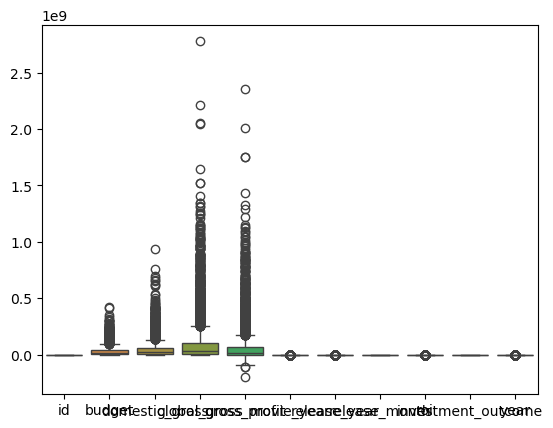

In [59]:
#checking for outlier #use boxplot to check cr column
sns.boxplot(tn_bom)

## Objective one

In [60]:
#consolidating target dataframe from tables through .join()
df1=pd.read_sql("""
    SELECT
        movie_ratings.movie_id,
        movie_basics.primary_title,
        movie_basics.runtime_minutes,
        movie_ratings.averagerating,
        movie_ratings.numvotes,
        movie_basics.genres,
        COUNT(movie_akas.region) AS region_count
    FROM movie_ratings
    JOIN movie_basics
        ON movie_ratings.movie_id = movie_basics.movie_id
    JOIN movie_akas
        ON movie_ratings.movie_id = movie_akas.movie_id
    GROUP BY
        movie_ratings.movie_id,
        movie_basics.primary_title,
        movie_ratings.averagerating,
        movie_ratings.numvotes
    ORDER BY region_count DESC;
""", conn)

df1.head()


,movie_id,primary_title,runtime_minutes,averagerating,numvotes,genres,region_count
0,tt2488496,Star Wars: Episode VII - The Force Awakens,136.0,8.0,784780,"Action,Adventure,Fantasy",59
1,tt1201607,Harry Potter and the Deathly Hallows: Part 2,130.0,8.1,691835,"Adventure,Drama,Fantasy",54
2,tt2310332,The Hobbit: The Battle of the Five Armies,144.0,7.4,438621,"Adventure,Fantasy",54
3,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,129.0,6.6,228592,"Action,Adventure,Fantasy",52
4,tt2278871,Blue Is the Warmest Color,180.0,7.8,124409,"Drama,Romance",52


In [61]:
#changing data type and column name for some columns to aid in analysis
df1['region_count'] = df1['region_count'].astype(str)
df1['runtime_minutes'] = df1['runtime_minutes'].astype(float)
df1['averagerating'] = df1['averagerating'].astype(str)
df1.rename(columns={'primary_title': 'title'}, inplace=True)
df1.dtypes

movie_id            object
title               object
runtime_minutes    float64
averagerating       object
numvotes             int64
genres              object
region_count        object
dtype: object

In [62]:
#dropping the movie_id column
df1.drop(columns='movie_id', inplace=True)

In [63]:
#dropping the null values
df1.dropna(inplace=True)

In [64]:
# Objectives: 1.Create a table linking movie ratings, vote counts, and box office revenues.
# Reading and loading the dataset
movie_budget= pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [65]:
#changing name of movie column to title
movie_budget.rename(columns={'movie': 'title'}, inplace=True)

In [66]:
# Dropping 'id' column
movie_budget.drop(columns=['id','release_date'], inplace=True)

In [67]:
# Drop duplicated rows based on 'title' column, keeping the first occurrence
movie_budget.drop_duplicates(subset='title', keep='first',inplace=True)

print("DataFrame after dropping duplicates:")
print(movie_budget.shape)

DataFrame after dropping duplicates:
(5698, 4)


In [70]:
#stripping the '$' sign before the columns and changing there datatype to int
to_change=movie_budget.columns[1:]
for char in to_change:
    
    # Check the max value in the column before conversion
    movie_budget[char].apply(pd.to_numeric, errors='coerce').max()


movie_budget.dtypes

title                object
production_budget     int32
domestic_gross        int32
worldwide_gross      object
dtype: object

### Creating a dataframe with all the datasets
Merging DataFrames with Fuzzy Matching on Titles

In [75]:
# We use fuzzywuzzy (or thefuzz) to match similar titles across datasets.
# Install fuzzywuzzy if not already installed
!pip install thefuzz

# Import required libraries
import pandas as pd
from thefuzz import process

In [76]:
#2. Standardize Movie Titles
# Before fuzzy matching, clean the movie titles to remove inconsistencies.Reduces mismatches due to capitalization, extra spaces, or minor differences.
def clean_title(title):
    return title.strip().lower()  # Remove spaces & lowercase

# Apply to all DataFrames
df1['title'] = df1['title'].apply(clean_title)
movie_budget['title'] = movie_budget['title'].apply(clean_title)


In [77]:
# 3. Fuzzy Matching Titles Across DataFrames
# Ensures we merge using the closest match instead of exact matches
# Find the best match for each title in the main DataFrame (movie_budget).
def match_titles(title, choices):
    match, score = process.extractOne(title, choices)  # Get best match & similarity score
    return match if score > 80 else None  # Only keep matches above 80% similarity


# Apply Fuzzy Matching to movie_budget
#Each title in movie_budget is matched with the best available title in df1 and matched titles stored in a new column matched_title in movie_budget.
movie_budget['matched_title'] = movie_budget['title'].apply(lambda x: match_titles(x, df1['title'].tolist()))



In [78]:
# Ensure the matched_title Column is Correct
# Before merging, check how many titles were successfully matched:
movie_budget['matched_title'].isnull().sum()  # Count unmatched titles

7

In [79]:
# Display rows where 'matched_title' is missing
movie_budget[movie_budget['matched_title'].isnull()]['title']

311         astã©rix aux jeux olympiques
575                            swordfish
828                           wyatt earp
3717    joheunnom nabbeunnom isanghannom
3798                                 pcu
3979                          persepolis
4201                           foolproof
Name: title, dtype: object

In [80]:
#dropping this null values from movie_budget['matched_title']
movie_budget.dropna(subset=['matched_title'], inplace=True)

In [81]:
#checking
movie_budget['matched_title'].isnull().sum()

0

In [82]:
# Filter df1 to Keep Only Matched Titles
df1_filtered = df1[df1['title'].isin(movie_budget['matched_title'])]
# This removes extra rows from df1, keeping only those that were matched to movies in movie_budget.

In [83]:
#  Merge the DataFrames on Matched Titles
movie_df = movie_budget.merge(df1_filtered, left_on='matched_title', right_on='title', how='left')
movie_df.head()

,title_x,production_budget,domestic_gross,worldwide_gross,matched_title,title_y,runtime_minutes,averagerating,numvotes,genres,region_count
0,avatar,425000000,760507625,2776345279,avatar,avatar,93.0,6.1,43,Horror,2
1,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,pirates of the caribbean: on stranger tides,pirates of the caribbean: on stranger tides,136.0,6.6,447624,"Action,Adventure,Fantasy",45
2,dark phoenix,350000000,42762350,149762350,dark phoenix,dark phoenix,113.0,6.0,24451,"Action,Adventure,Sci-Fi",34
3,avengers: age of ultron,330600000,459005868,1403013963,avengers: age of ultron,avengers: age of ultron,141.0,7.3,665594,"Action,Adventure,Sci-Fi",40
4,star wars ep. viii: the last jedi,317000000,620181382,1316721747,star wars: the last jedi,star wars: the last jedi,152.0,7.1,462903,"Action,Adventure,Fantasy",48


In [84]:
# Drop Extra Columns (Optional)
movie_df.drop(columns=['matched_title','title_y'], inplace=True)

In [85]:
# Find and remove duplicates
duplicates = movie_df.duplicated()
movie_df = movie_df.drop_duplicates()

In [86]:
#changing datatype of region_count
movie_df['region_count'] = movie_df['region_count'].astype(int)

In [87]:
#changing column names
movie_df.rename(columns={'title_x': 'title'}, inplace=True)
movie_df.head()

,title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,genres,region_count
0,avatar,425000000,760507625,2776345279,93.0,6.1,43,Horror,2
1,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,136.0,6.6,447624,"Action,Adventure,Fantasy",45
2,dark phoenix,350000000,42762350,149762350,113.0,6.0,24451,"Action,Adventure,Sci-Fi",34
3,avengers: age of ultron,330600000,459005868,1403013963,141.0,7.3,665594,"Action,Adventure,Sci-Fi",40
4,star wars ep. viii: the last jedi,317000000,620181382,1316721747,152.0,7.1,462903,"Action,Adventure,Fantasy",48


In [88]:
#After merging, we save the final dataset for further EDA.
movie_df.to_csv("merged_movie_data.csv", index=False)

### Merge imdb Database Tables(movie_akas and movie_basics)

In [89]:
# Read the movie basic table
basic = pd.read_sql("""SELECT *
                FROM movie_basics;
                """,conn)
basic

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [92]:
# Read the movie akas table
akas = pd.read_sql("""SELECT *
                FROM movie_akas;
                """,conn)
akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [93]:
# Merge the tables
basic_akas_imdb = pd.merge(basic, akas, how='left', on="movie_id")
basic_akas_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2.0,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4.0,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5.0,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355540,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355541,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355542,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355543,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
basic_akas_imdb.isna().sum()

movie_id                  0
primary_title             0
original_title           32
start_year                0
runtime_minutes       41326
genres                 6663
ordering              23842
title                 23842
region                77135
language             313830
types                187098
attributes           340620
is_original_title     23867
dtype: int64

In [95]:
# Select the wanted columns
basic_akas = basic_akas_imdb[['movie_id', 'genres','title']]
basic_akas

,movie_id,genres,title
0,tt0063540,"Action,Crime,Drama",Sangharsh
1,tt0063540,"Action,Crime,Drama",Sunghursh
2,tt0063540,"Action,Crime,Drama",Sunghursh
3,tt0063540,"Action,Crime,Drama",Sunghursh
4,tt0063540,"Action,Crime,Drama",Sungharsh
...,...,...,...
355540,tt9916538,Drama,NaN
355541,tt9916622,Documentary,NaN
355542,tt9916706,Comedy,NaN
355543,tt9916730,None,NaN


In [96]:
basic_akas.isna().sum()

movie_id        0
genres       6663
title       23842
dtype: int64

In [97]:
# Drop null values
basic_akas = basic_akas.dropna()
basic_akas.isna().sum()

movie_id    0
genres      0
title       0
dtype: int64

### combine tn_bom and basic_akas

In [98]:
tn_bombasic_akas = pd.merge(tn_bom, basic_akas, how="inner", on="title")
tn_bombasic_akas

,id,release_date,title,budget,domestic_gross,global_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile,year,movie_id,genres
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2009,12,5.532577,1,Top 25,2009,tt1775309,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,1.546673,1,Top 25,2011,tt1298650,"Action,Adventure,Fantasy"
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,1.546673,1,Top 25,2011,tt1298650,"Action,Adventure,Fantasy"
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,1.546673,1,Top 25,2011,tt1298650,"Action,Adventure,Fantasy"
4,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,2019,6,-0.572108,0,Top 25,2019,tt6565702,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441,67,2006-04-28,Clean,10000.0,138711.0,1.387110e+05,1.287110e+05,2006,2006,4,12.871100,1,Bottom 25,2006,tt6619196,"Comedy,Drama,Horror"
9442,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,2001,2001,7,8.459600,1,Bottom 25,2001,tt1872026,Drama
9443,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,2001,2001,7,8.459600,1,Bottom 25,2001,tt2027234,Thriller
9444,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,2012,2012,1,-0.490667,0,Bottom 25,2012,tt1880418,"Comedy,Drama"


### Save the new dataset to csv

In [99]:
tn_bombasic_akas.to_csv("new_movie.csv")

### Merge The Numbers(tn) with imdb Database

In [105]:
# merge movie_basics and budget on movie and movie_title
merged_tn_imdb = pd.merge(imdb, tn, left_on="movie_title", right_on="title", how="inner")

1. Separated and analyzed the 'Genre' column. 
2. Selecting the first listed genre as the primary genre for further analysis. 
3. Identified the top 5 genres that appeared most frequently with the highest ratings.

In [106]:
# Using str.split() and str.get() to extract the first genre
merged_tn_imdb['main_genre'] = merged_tn_imdb['genres'].str.split(',').str.get(0)
merged_tn_imdb

,movie_id,genres,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,...,domestic_gross,worldwide_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile,main_genre
0,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,...,652270625.0,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action
1,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,actress,Judy Greer,124.0,Jurassic World,None,...,652270625.0,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action
2,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,actress,Bryce Dallas Howard,124.0,Jurassic World,None,...,652270625.0,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action
3,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,writer,Rick Jaffa,124.0,Jurassic World,None,...,652270625.0,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action
4,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,actor,Chris Pratt,124.0,Jurassic World,None,...,652270625.0,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384704,tt8976472,"Documentary,Music",6.6,27,FI,producer,Elli Toivoniemi,69.0,Never Again,None,...,307631.0,3.087930e+05,-1.912070e+05,2002,2002,7,-0.382414,0,Bottom 25,Documentary
384705,tt8976472,"Documentary,Music",6.6,27,FI,writer,Jussi Sandhu,69.0,Never Again,None,...,307631.0,3.087930e+05,-1.912070e+05,2002,2002,7,-0.382414,0,Bottom 25,Documentary
384706,tt8976472,"Documentary,Music",6.6,27,FI,cinematographer,Mikko Parttimaa,69.0,Never Again,None,...,307631.0,3.087930e+05,-1.912070e+05,2002,2002,7,-0.382414,0,Bottom 25,Documentary
384707,tt8976472,"Documentary,Music",6.6,27,FI,composer,Asger Baden & Peder,69.0,Never Again,None,...,307631.0,3.087930e+05,-1.912070e+05,2002,2002,7,-0.382414,0,Bottom 25,Documentary


In [108]:
# Split genres and expand them into separate rows using apply and pd.Series
# Filter out None or NaN values before applying split
merged_tn_imdb_exp = merged_tn_imdb['genres'].dropna().apply(lambda x: pd.Series(x.split(','))).stack().reset_index(level=1, drop=True)

# Set the name of the expanded column
merged_tn_imdb_exp.name = 'genres'

# Join the expanded genres with the original dataframe
merged_tn_imdb = merged_tn_imdb.drop('genres', axis=1).join(merged_tn_imdb_exp)

# Verify the result
merged_tn_imdb.head()

,movie_id,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg,...,worldwide_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile,main_genre,genres
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.000054,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Action
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.000054,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Adventure
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.000054,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Sci-Fi
1,tt0369610,7.0,539338,BG,actress,Judy Greer,124.0,Jurassic World,None,0.000054,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Action
1,tt0369610,7.0,539338,BG,actress,Judy Greer,124.0,Jurassic World,None,0.000054,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Adventure


In [109]:
merged_tn_imdb.to_csv("tn_imbd.csv")

### Merging the whole datasets

In [110]:
tn.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'gross_profit', 'movie_year', 'release_year',
       'release_month', 'roi', 'investment_outcome', 'quartile'],
      dtype='object')

In [111]:
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [112]:
basic_akas.columns

Index(['movie_id', 'genres', 'title'], dtype='object')

In [113]:
imdb.columns

Index(['movie_id', 'genres', 'avg_ratings', 'num_votes', 'region', 'category',
       'artist_name', 'screen_time', 'movie_title', 'death_year',
       'weighted_avg'],
      dtype='object')

In [114]:
data = pd.read_sql("""
SELECT * 
FROM movie_basics as mb
INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
INNER JOIN movie_akas ma ON mb.movie_id = ma.movie_id
INNER JOIN principals p ON mb.movie_id = p.movie_id;""", conn)

In [115]:
data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,...,language,types,attributes,is_original_title,movie_id,ordering,person_id,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,...,hi,None,alternative transliteration,0.0,tt0063540,1,nm0474801,actor,None,"[""Kundan S. Prasad"",""Bajrangi""]"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,...,hi,None,alternative transliteration,0.0,tt0063540,2,nm0904537,actress,None,"[""Munni"",""Laila-E-Aasmaan""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,...,hi,None,alternative transliteration,0.0,tt0063540,3,nm0756379,actor,None,"[""Ganeshi N. Prasad""]"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,...,hi,None,alternative transliteration,0.0,tt0063540,4,nm0474876,actor,None,"[""Dwarka N. Prasad""]"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,...,hi,None,alternative transliteration,0.0,tt0063540,5,nm0712540,director,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423181,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,8.4,365,tt9911774,...,ml,None,alternative spelling,0.0,tt9911774,6,nm10536453,writer,screenplay associate,None
2423182,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,8.4,365,tt9911774,...,ml,None,alternative spelling,0.0,tt9911774,7,nm10536454,writer,screenplay associate,None
2423183,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,8.4,365,tt9911774,...,ml,None,alternative spelling,0.0,tt9911774,8,nm10536456,composer,None,None
2423184,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,8.4,365,tt9911774,...,ml,None,alternative spelling,0.0,tt9911774,9,nm10536455,composer,None,None


In [116]:
# Dropping unnecessary columns
def drop_duplicate_columns(data):
    """
    Drops duplicate columns in a DataFrame, keeping only one copy.
    
    Parameters:
    df (pd.DataFrame): The DataFrame with potential duplicate columns.

    Returns:
    pd.DataFrame: A cleaned DataFrame with duplicate columns removed.
    """
    return data.loc[:, ~data.columns.duplicated()]


In [117]:
drop_duplicate_columns(data)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title,person_id,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0,nm0474801,actor,None,"[""Kundan S. Prasad"",""Bajrangi""]"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0,nm0904537,actress,None,"[""Munni"",""Laila-E-Aasmaan""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0,nm0756379,actor,None,"[""Ganeshi N. Prasad""]"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0,nm0474876,actor,None,"[""Dwarka N. Prasad""]"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0,nm0712540,director,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423181,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,3,Padmavyoohathile Abhimanyu,IN,ml,None,alternative spelling,0.0,nm10536453,writer,screenplay associate,None
2423182,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,3,Padmavyoohathile Abhimanyu,IN,ml,None,alternative spelling,0.0,nm10536454,writer,screenplay associate,None
2423183,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,3,Padmavyoohathile Abhimanyu,IN,ml,None,alternative spelling,0.0,nm10536456,composer,None,None
2423184,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,3,Padmavyoohathile Abhimanyu,IN,ml,None,alternative spelling,0.0,nm10536455,composer,None,None


In [118]:
data.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes',
       'movie_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title', 'movie_id', 'ordering', 'person_id',
       'category', 'job', 'characters'],
      dtype='object')

In [119]:
# List of columns to drop
columns_to_drop = ['movie_id', 
       'movie_id', 'ordering', 'region', 'runtime_minutes', 'language', 'types',
       'attributes', 'is_original_title', 'movie_id', 'person_id', 'job', 'characters']

# Drop the columns
data.drop(columns=columns_to_drop, inplace=True)

# Verify the remaining columns
data.columns

Index(['primary_title', 'original_title', 'start_year', 'genres',
       'averagerating', 'numvotes', 'title', 'category'],
      dtype='object')

In [120]:
data.isna().sum()

primary_title        0
original_title       0
start_year           0
genres            9057
averagerating        0
numvotes             0
title                0
category             0
dtype: int64

In [121]:
print(tn_bom.columns)
print(basic_akas_imdb.columns)

Index(['id', 'release_date', 'title', 'budget', 'domestic_gross',
       'global_gross', 'gross_profit', 'movie_year', 'release_year',
       'release_month', 'roi', 'investment_outcome', 'quartile', 'year'],
      dtype='object')
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'ordering', 'title', 'region', 'language',
       'types', 'attributes', 'is_original_title'],
      dtype='object')


In [133]:
# Merge the DataFrames on 'title'
merged_df = pd.merge(tn_bom, basic_akas_imdb, how='left', on='title')

# Verify the merged DataFrame
merged_df.head()

,movie_id_x,release_date,title,budget,domestic_gross,global_gross,gross_profit,movie_year,release_year,release_month,...,original_title,start_year,runtime_minutes,genres,ordering,region,language,types,attributes,is_original_title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2009,12,...,Abatâ,2011.0,93.0,Horror,2.0,XWW,en,imdbDisplay,None,0.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",14.0,US,None,None,None,0.0
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",19.0,None,None,original,None,1.0
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",23.0,CA,en,imdbDisplay,None,0.0
4,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,2019,6,...,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",16.0,US,None,None,None,0.0


In [129]:
merged_df.columns

Index(['movie_id_x', 'release_date', 'title', 'budget', 'domestic_gross',
       'global_gross', 'gross_profit', 'movie_year', 'release_year',
       'release_month', 'roi', 'investment_outcome', 'quartile', 'year',
       'movie_id_y', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'ordering', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [130]:
print(merged_df[['movie_id_x', 'movie_id_y']].head())

   movie_id_x movie_id_y
0           1  tt1775309
1           2  tt1298650
2           2  tt1298650
3           2  tt1298650
4           3  tt6565702


In [132]:
merged_df.rename(columns={'movie_id_x': 'internal_movie_id', 'movie_id_y': 'imdb_movie_id'}, inplace=True)
merged_df[['internal_movie_id', 'imdb_movie_id']].drop_duplicates()
print(merged_df.head())

   internal_movie_id release_date  \
0                  1   2009-12-18   
1                  2   2011-05-20   
2                  2   2011-05-20   
3                  2   2011-05-20   
4                  3   2019-06-07   

                                         title       budget  domestic_gross  \
0                                       Avatar  425000000.0     760507625.0   
1  Pirates of the Caribbean: On Stranger Tides  410600000.0     241063875.0   
2  Pirates of the Caribbean: On Stranger Tides  410600000.0     241063875.0   
3  Pirates of the Caribbean: On Stranger Tides  410600000.0     241063875.0   
4                                 Dark Phoenix  350000000.0      42762350.0   

   global_gross  gross_profit  movie_year  release_year  release_month  ...  \
0  2.776345e+09  2.351345e+09        2009          2009             12  ...   
1  1.045664e+09  6.350639e+08        2011          2011              5  ...   
2  1.045664e+09  6.350639e+08        2011          2011          

In [135]:
# Merge the DataFrames on 'title'
merged_df2 = pd.merge(tn_bombasic_akas, merged_df, how='left', on='title')
merged_df2

,id,release_date_x,title,budget_x,domestic_gross_x,global_gross_x,gross_profit_x,movie_year_x,release_year_x,release_month_x,...,original_title,start_year,runtime_minutes,genres_y,ordering,region,language,types,attributes,is_original_title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2009,12,...,Abatâ,2011.0,93.0,Horror,2.0,XWW,en,imdbDisplay,None,0.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",14.0,US,None,None,None,0.0
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",19.0,None,None,original,None,1.0
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",23.0,CA,en,imdbDisplay,None,0.0
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,2011,5,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",14.0,US,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72701,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,2001,2001,7,...,Cure,2014.0,NaN,None,1.0,GR,None,None,None,0.0
72702,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,2012,2012,1,...,Newlyweds,2011.0,95.0,"Comedy,Drama",1.0,US,None,None,None,0.0
72703,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,2012,2012,1,...,Newlyweds,2011.0,95.0,"Comedy,Drama",2.0,None,None,original,None,1.0
72704,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,2012,2012,1,...,Newlyweds,2011.0,95.0,"Comedy,Drama",1.0,US,None,None,None,0.0


In [136]:
merged_df2.columns

Index(['id', 'release_date_x', 'title', 'budget_x', 'domestic_gross_x',
       'global_gross_x', 'gross_profit_x', 'movie_year_x', 'release_year_x',
       'release_month_x', 'roi_x', 'investment_outcome_x', 'quartile_x',
       'year_x', 'movie_id', 'genres_x', 'movie_id_x', 'release_date_y',
       'budget_y', 'domestic_gross_y', 'global_gross_y', 'gross_profit_y',
       'movie_year_y', 'release_year_y', 'release_month_y', 'roi_y',
       'investment_outcome_y', 'quartile_y', 'year_y', 'movie_id_y',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres_y', 'ordering', 'region', 'language', 'types', 'attributes',
       'is_original_title'],
      dtype='object')

In [138]:
# Step 1: Combine or clean up _x and _y columns
for col in merged_df2.columns:
    if col.endswith('_x'):
        base_col = col[:-2]  # Remove '_x' suffix
        if f"{base_col}_y" in merged_df2.columns:
            # Combine _x and _y columns
            merged_df2[base_col] = merged_df2[col].combine_first(merged_df2[f"{base_col}_y"])
            # Drop the redundant columns
            merged_df2.drop(columns=[col, f"{base_col}_y"], inplace=True)
        else:
            # Rename _x to its base name
            merged_df2.rename(columns={col: base_col}, inplace=True)

# Drop remaining _y columns if any
merged_df2.drop(columns=[col for col in merged_df2.columns if col.endswith('_y')], inplace=True)

# Step 2: Verify the result
print(merged_df2.columns)

Index(['id', 'title', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'ordering', 'region', 'language',
       'types', 'attributes', 'is_original_title', 'release_date', 'budget',
       'domestic_gross', 'global_gross', 'gross_profit', 'movie_year',
       'release_year', 'release_month', 'roi', 'investment_outcome',
       'quartile', 'year', 'genres'],
      dtype='object')


In [1]:
merged_df2.shape

NameError: name 'merged_df2' is not defined

In [139]:
# Merge the DataFrames on 'title'
merged_df3 = pd.merge(merged_tn_imdb, merged_df2, how='left', on='title')
merged_df3

MemoryError: Unable to allocate 2.84 GiB for an array with shape (8, 47573672) and data type float64

## OBJECTIVE 2


Develop a regression model to predict box office profits based on the following key features:

        1. Production Budget: The financial investment required to produce the film.

        2. Genre: The category or type of movie (e.g., action, drama, comedy).

        3. Runtime: The duration of the movie in minutes.

        4. Release Date: The timing of the film's release, which may impact audience turnout.

        5. Domestic Gross Revenue: The total revenue generated within the domestic market.

        6. Worldwide Gross Revenue: The total revenue generated globally.

        7. Foreign Gross Revenue: The revenue generated outside the domestic market.

        8. Ratings: Audience and critic reviews, reflecting the perceived quality of the movie.

        9. Number of Votes: The total number of ratings received, indicating audience engagement.

This model aims to forecast profitability for upcoming projects, enabling the studio to make data-driven decisions regarding production, marketing, and release strategies.

In [ ]:
#1. Load tn.movie_budgets.csv.gz
tn_movie_budgets_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\tn.movie_budgets.csv.gz"
tn_movie_budgets = pd.read_csv(tn_movie_budgets_path)
tn_movie_budgets.head()
#tn_movie_budgets.shape

In [ ]:
#2. Load bom.movie_gross.csv.gz

bom_movie_gross_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz"
bom_movie_gross = pd.read_csv(bom_movie_gross_path)
bom_movie_gross.head()

In [ ]:
#5. load tmdb.movies.csv.gz

tmdb_movies = pd.read_csv("C:\\Users\\Fluxtech\\Desktop\\dsc-phase-2-project-v3\\zippedData\\tmdb.movies.csv.gz")

tmdb_movies.head()

# EDA/ Data Visualization

#### Identifying high performing movie genres

In [ ]:
#creatinf new column of total gross for a movie for analysis
movie_df['total_gross'] = movie_df['domestic_gross'] + movie_df['worldwide_gross']

In [ ]:
#cleaning the genre column to single values
# 1.Split the genres by comma (,) to separate them into a list.
# Split the genre by comma and keep the first genre, Select the first genre from each list and reassign
movie_df['genres'] = movie_df['genres'].str.split(',').str[0]
movie_df.genres.head(5)

In [ ]:
# Understanding Genre Performance
movie_df['genres'].value_counts().plot(kind='bar', title="Number of Movies per Genre");

In [ ]:
# Number of Movies per Genre:
# Shows how frequently a genre is produced.
# Calculation: df['genre'].value_counts()
movie_df['genres'].value_counts()

Helps identify which genres are most and least produced. Genre Most produced are Dramas

### Revenue & Budget Distribution

In [ ]:
# Are revenues and budgets normally distributed? or not
plt.figure(figsize=(12,5))

# Revenue distribution
plt.subplot(1,2,1)
sns.histplot(movie_df['total_gross'], bins=30, kde=True, color='blue')
plt.title("Revenue Distribution")

# Budget distribution
plt.subplot(1,2,2)
sns.histplot(movie_df['production_budget'], bins=30, kde=True, color='red')
plt.title("Budget Distribution")

plt.show()

Our data is right-skewed,common in datasets involving revenue and production budgets, as a small number of movies (blockbusters) tend to generate significantly higher revenues or have higher budgets compared to the majority.Most of the values are concentrated around the lower end of the range (e.g., smaller production budgets or lower revenues), while the tail on the right side represents a small number of movies with extraordinarily high values (e.g., blockbuster hits).

In [ ]:
# Apply log transformation (adding a small constant to avoid log(0) if necessary)
movie_df['log_production_budget'] = np.log(movie_df['production_budget'] + 1)
movie_df['log_total_gross'] = np.log(movie_df['total_gross'] + 1)

# Plot the log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(movie_df['log_production_budget'], bins=30, edgecolor='black')
plt.title('Log-Transformed Production Budget')
plt.xlabel('Log of Production Budget')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(movie_df['log_total_gross'], bins=30, edgecolor='black')
plt.title('Log-transformed total_gross')
plt.xlabel('Log of total_gross')
plt.ylabel('Frequency')
plt.show()
# Applying Log transformations  to handle this right-skewed data.
# It compresses the higher values (long tail) and makes the data distribution more symmetric.

### Calculating profitability

In [ ]:
# Remove dollar signs and commas, then convert to numeric for relevant columns
tn['production_budget'] = tn['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tn['domestic_gross'] = tn['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check the data types to ensure proper conversion
print(tn[['production_budget', 'domestic_gross', 'worldwide_gross']].dtypes)

In [ ]:
# Calculating profit and profitability ratio using worldwide gross
tn['profit'] = tn['worldwide_gross'] - tn['production_budget']
tn['profitability_ratio'] = tn['worldwide_gross'] / tn['production_budget']

### Correlation between budget and the World-wide gross(Revenue)

In [ ]:
# Calculate correlation between budget and worldwide gross
correlation = tn[['production_budget', 'worldwide_gross']].corr()
print(correlation)

correlation between production budget and worldwide gross is 0.7483 which indicates a strong positive relationship between the two variables.In general, movies with higher production budgets may tend to have higher worldwide gross earnings this means that production budget is an importantfactor in determining box office revenue ,although there are still variations to this

In [ ]:
# Scatter plot with a line of best fit to visualize Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=tn, scatter_kws={'s': 50}, line_kws={'color': 'red', 'lw': 2})

# Add labels and title
plt.title('Production Budget vs Worldwide Gross (Revenue) with Line of Best Fit')
plt.xlabel('Production Budget (in dollars)')
plt.ylabel('Worldwide Gross (in dollars)')
plt.show()

There is a positive correlation of 0.748306 between production budget and World-wide gross (Revenue)

In [ ]:
# Sort by profitability ratio
high_profitability = tn.sort_values(by='profitability_ratio', ascending=False).head(10)
print(high_profitability[['production_budget', 'worldwide_gross', 'profitability_ratio']])

Lower budget films can sometimes out perform high budget films when it comes to profitability.this can be seen from the first film which has a budget of 25000 and has the highest profitability ratio.

As budget increases ,there is also a tendency of having diminishing returns in the sense that despite increasing the production budget and having large revenues ,this profitability ratio may be small compared to smaller-budget films.

This clearly shows that a higher production budget is not necessarily an indicator of higher profitability and there are other factors involved in achieving profitability

In [ ]:
# Define budget ranges
bins = [0, 1e6, 1e7, 5e7, 1e8, 5e8, 1e9]
labels = ['$0-1M', '$1M-10M', '$10M-50M', '$50M-100M', '$100M-500M', '$500M+']
tn['budget_range'] = pd.cut(tn['production_budget'], bins=bins, labels=labels)

# Calculate the average revenue-to-budget ratio for each budget range
tn['revenue_to_budget'] = tn['worldwide_gross'] / tn['production_budget']
revenue_by_budget_range = tn.groupby('budget_range')['revenue_to_budget'].mean()
print(revenue_by_budget_range)

In [ ]:
# Box plot to visualize the distribution of worldwide gross across budget ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_range', y='worldwide_gross', data=tn)
plt.title('Revenue Distribution by Budget Range')
plt.xlabel('budget_range')
plt.ylabel('Worldwide Gross')
plt.show()

As the production budget increases, the revenue-to-budget ratio decreases. Larger-budget films, especially those in the $10M-100M range, are less efficient in turning budget into revenue.

Moderate budgets films offer good return on Investment From the ranges in the 1M - 10M and
10M-50M they have strong returns, although these returns become more variable as the budget grows.

In [ ]:
# Load the dataset
file = "new_movie.csv"
data = pd.read_csv(file)
data

In [ ]:
data['profitable_ratio'] = data['global_gross']/data['budget']
data.info()

### Univariate Analysis

In [ ]:
# Summary statistics for numerical columns
numerical_cols = ['budget', 'global_gross', 'profitable_ratio']
print(data[numerical_cols].describe())
# Histograms for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

- Visualize the distribution of continuous variables like budget, global_gross, and profitability_ratio.
- sns.histplot() adds a kernel density estimate (KDE) to show the distribution's shape

### Bivariate Analysis

### Key Metrics of Success

To determine which genres perform best at the box office, consider these key metrics:

### 1. Financial Metrics (Revenue-Based)

#### Total & Average Revenue per Genre

Helps Identifies top-earning genres. We are analyzing how the sum and average of the revenue vary across different genres, with each metric providing different insights

In [ ]:
# 1. Financial Metrics (Revenue-Based)
# Total Box Office Revenue: (Measures overall performance of a genre.)
# The total revenue for each genre is the sum of the revenue generated by all movies in that genre.
# This metric is helpful for understanding which genres, as a whole, contribute the most to overall revenue.
# High total revenue can indicate that the genre has a large number of films (even if individual movies perform moderately) or that it has a few high-performing blockbusters that dom
gross_by_genre = movie_df[['genres', 'total_gross']]
gross_by_genre.groupby('genres').sum().sort_values(by='total_gross', ascending=False).head(5)

In [ ]:
# Total Revenue gives you an idea of which genre is the most commercially successful overall.
movie_df.groupby('genres')['total_gross'].sum().sort_values(ascending=False).plot
(kind='bar', title="Total Revenue per Genre")

collectively, all the action movies in your dataset have earned the most money compared to movies in other genres. (This could be due to a large number of action movies, or the action movies themselves may have performed exceptionally well in terms of revenue.) High total revenue doesn't necessarily mean high average revenue. If a genre has a large number of films, but they are mostly lower-revenue films, the total revenue might be high, but the average revenue could still be low.

In [ ]:
# Average Revenue per Movie (Mean Gross):
# Helps compare genres with different numbers of movies.
# The average revenue is the mean of all revenue values within a genre.
# This tells you how much a typical movie in that genre makes on average.
# Calculation: total_revenue / number_of_movies_per_genre
movie_df.groupby('genres')['total_gross'].mean().sort_values( ascending=False).head(5)

In [ ]:
# Average Revenue helps you understand which genre produces higher-grossing 
# films on average, regardless of how many movies belong to that genre.
movie_df.groupby('genres')['total_gross'].mean().sort_values(ascending=False).plot
(kind='bar', title="Average Revenue per Genre");

The average is useful for understanding which genres typically perform well on an individual basis.
 A high average revenue suggests that the movies in that genre, on average, tend to perform well.If a genre has a low average revenue, it might indicate that while the genre has a few successful films, most films underperform.Average revenue is more stable than total revenue since it accounts for the number of movies and helps isolate the performance of typical films in each genre

 indicates that, on average, each sci-fi movie has earned more than other genres. **Action** movies may be more numerous  boosting their total revenue.**Sci-fi** movies, although fewer, may have a few high-performing films that push the average revenue higher.

### Median Revenue per Genre:

The median (represents the middle value when all revenues within a genre are sorted), itis less sensitive to outliers than the mean, providing a better measure of central tendency for data with skewness or extreme values. If certain genres (Mystery,Action,Adventure,Western,Sci-fi) have higher median revenue values compared to others, it suggests that these genres are more likely to generate higher revenues on average. Genres with low or consistent median revenue might indicate that these genres do not perform as well financially, or that movies in these genres are more likely to have lower or similar revenue outcomes, indicating that these films tend to attract smaller audiences or have niche markets.

In [ ]:
# Reduces the effect of outliers (huge blockbusters vs. small films).
# Calculation: df.groupby('genre')['total_revenue'].median()
movie_df.groupby('genres')['total_gross'].median().sort_values(ascending=False).plot(kind='bar', title="Median Revenue per Genre");

The median revenue values for each genre will tell you the central tendency of the revenue within that genre. Genres with a high median value suggest that the typical movie in that genre performs well financially.

#### Outliers and Revenue Distribution

Even though the median is robust against extreme values, we went a step further to investigate the distribution within each genre (top 3 and bottom 3) using Boxplots or histograms to reveal if a genre has a wide range of revenue, where a few movies in the genre might perform extremely well (outliers).

A high median with large variation could suggest that while most movies in the genre perform well, there are some extremely high-performing outliers.

In [ ]:
# Calculate median total gross revenue per genre
median_revenue_per_genre = movie_df.groupby('genres')['total_gross'].median().sort_values(ascending=False)

# Get top 3 and bottom 3 genres based on median total revenue
top_5_genres = median_revenue_per_genre.head(5).index
bottom_2_genres = median_revenue_per_genre.tail(2).index

# Filter the DataFrame for the top 3 and bottom 3 genres
top_bottom_genres_df = movie_df[movie_df['genres'].isin(top_3_genres.append(bottom_3_genres))]

# Set up the plotting area
plt.figure(figsize=(14, 7))

# Plot the distribution of total gross for top 3 genres
plt.subplot(1, 2, 1)
sns.boxplot(x='genres', y='total_gross', data=top_bottom_genres_df, palette='coolwarm')
plt.title('Top 5 and Bottom 2 Genres - Boxplot')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.show()
plt.savefig('revenue_distribution_per_genre.png', dpi=300);

This boxplot visualizes the total gross revenue of movies across various genres, focusing on the top 5 high-performing genres (Action, Adventure, Sci-Fi, Mystery) and the bottom 2 genres (Western, History, Musical).

Numerous outliers are visible above the whiskers, indicating the presence of a few movies that performed exceptionally well.

1. Identifying High-Performing Genres: Action, Adventure, and Sci-Fi have the largest median revenues compared to other genres, suggesting consistent performance at the box office. These genres also display numerous outliers above the upper whisker, indicating that a few movies significantly outperformed their peers, contributing to their high overall revenue. Mystery follows as a relatively strong performer but shows less variation compared to the top 3 genres. These genres could be considered high-performing because of both their high medians and presence of blockbuster outliers.

2. Outliers and Revenue Distribution: The Action and Adventure genres exhibit the widest range in revenue, with many outliers in the upper range. This suggests a mix of moderately performing movies and a few exceptional box office hits driving the genre's overall performance. Sci-Fi also has notable variation, but its distribution appears slightly more centralized than Action and Adventure (this can be because there are only 29 sci-fi films in the dataset). Mystery shows moderate variability with fewer extreme outliers, suggesting it is less reliant on blockbusters for its median performance. In contrast, Western, History, and Musical show much smaller revenue distributions, with low medians and fewer outliers. These genres consistently underperform relative to the top genres.

3. Recommendations for Investigating Further: Action and Adventure genres should be analyzed to understand what factors contribute to the outliers (e.g., franchise movies, high budgets, specific directors). Investigate the correlation between production budgets and box office success in Sci-Fi movies to determine if higher spending consistently leads to better performance. Consider genre combinations or trends (e.g., Sci-Fi Adventure) to pinpoint patterns that contribute to high revenues. Study the performance of niche genres like Mystery to explore their potential for profitability in specific markets.

###  Revenue Distribution per Genre:

In [ ]:
# Understanding variability within genres.
# Calculation: df.groupby('genre')['total_revenue'].describe()
movie_df.groupby('genres')['total_gross'].describe()

The table provides summary statistics for total gross revenue per genre, helping us understand variability, skewness, and revenue trends in the movie industry.

Key Observations
1. **Highest-Grossing Genres (on Average)**
Sci-Fi (225M), Adventure (221M), and Action (210M) have the highest mean revenues, indicating they are generally profitable.
These genres also have high standard deviations, meaning revenue varies widely (some movies perform exceptionally well, while others underperform).
Maximum values for these genres reach into the billions, suggesting blockbuster hits.
2.  **High Variability Genres(Large Standard Deviation)**
Action, Adventure, and Horror exhibit large standard deviations (300M+), meaning revenues within these genres are highly inconsistent.
These genres often have big-budget hits and major flops.
The max revenue for Horror (3.5B) is an outlier, possibly due to a single extraordinarily successful film.
3.  **More Consistent Genres (Lower Standard Deviation)**
Documentary (179M), Biography (178M), and Comedy (144M) have lower standard deviations, meaning revenue distribution is more predictable.
The revenue differences within these genres are relatively smaller, and extreme hits are rarer.
4.  **Right-Skewed Distributions (Mean > Median)**
Action, Adventure, and Horror have means much higher than their medians, indicating a right-skewed distribution.
A few blockbuster movies drive up the mean, while most movies earn significantly less.
5.  **Genres with Low Revenue and Small Sample Sizes**
Musical, Sport, and War genres have very few movies (≤ 3 entries), making their revenue stats less reliable.
Western (2 movies) and History (2 movies) have low counts, meaning any outliers have a major effect on the mean.
The War genre has only one movie, so the standard deviation is NaN (not applicable).
6.  **The Impact of Outliers**
Horror: Despite a median revenue of 40M, its mean is 110M, and its max is 3.5B—indicating a massive blockbuster affecting the average.
Action: Has a max of 2.9B, pulling the mean upwards even though its median is only 83M.
Final Insights
Action, Adventure, and Sci-Fi are the highest-earning genres on average, but their revenue is highly variable.
Horror has a few extremely high-grossing films, but most movies make significantly less than the top performers.
Comedy and Drama have more stable revenues, meaning earnings in these genres are more predictable.
The median is a better measure than the mean for skewed distributions like Action and Horror, where a few massive hits distort the average.
Genres with low sample sizes (Sport, Musical, War, Western) need careful interpretation, as their statistics may not be reliable.

In [ ]:
# Boxplot: Revenue Distribution per Genre
plt.figure(figsize=(14, 6))
sns.boxplot(data=movie_df, x=movie_df.genres, y=movie_df.total_gross, showfliers=True)
plt.xticks(rotation=90)
plt.yscale('log')  # Using log scale to better visualize differences
plt.title("Revenue Distribution per Genre")
plt.xlabel("Genres")
plt.ylabel("Total Gross Revenue (Log Scale)")
plt.show()

### Revenue vs. Budget (Does Spending More Lead to Higher Earnings?)

scatter plot or correlation analysis between total revenue and production budget helps us determine whether higher spending leads to higher earning

In [ ]:
sns.scatterplot(x=movie_df['production_budget'], y=movie_df['total_gross'], alpha=0.5)
plt.title("Production Budget vs. Revenue")
plt.xlabel("Production Budget")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
movie_df.production_budget.corr(movie_df.total_gross)

A positive correlation (higher budget → higher revenue). The plot displays a positive correlation between production budget and total revenue. As the production budget increases, the total revenue tends to increase as well. However, the correlation is not perfectly linear—there is noticeable spread in the data points.

Detailed Analysis:

**Strong clustering at lower budgets**:

A significant number of movies have low production budgets (under 50 million), and their revenues are spread widely, ranging from minimal to moderately high revenue. This indicates that a low-budget movie can either underperform or occasionally achieve high revenue, but the latter is less frequent.

**High-budget outliers**:

Movies with production budgets exceeding 200 million tend to generate much higher revenues, often surpassing $1 billion. These are likely blockbuster movies with significant marketing and franchise value (e.g., superhero movies, sequels).

**Diminishing returns**:

While higher budgets often result in higher revenues, the relationship appears to plateau at very high budgets (e.g., above 300 million). Beyond this point, increasing the budget does not guarantee a proportional increase in revenue.

In [ ]:
# Boxplot: Distribution of Production Cost per Genre
# A boxplot shows the spread of production costs within each genre and highlights outliers.
plt.figure(figsize=(14, 6))
sns.boxplot(data=movie_df, x=movie_df.genres, y=movie_df.production_budget, showfliers=True)
plt.xticks(rotation=90)
plt.yscale('log')  # Log scale to improve visibility of variations
plt.title("Production Budget Distribution per Genre")
plt.xlabel("Genre")
plt.ylabel("Production Budget (Log Scale)")
plt.show()

Outliers (dots above the whiskers) represent exceptionally high-budget films.

The medians (middle line in the box) do not vary significantly across the genres, suggesting that some genres have consistently higher production costs.

In [ ]:
# Bar Chart: Average Production Cost per Genre
# This shows the mean production budget for each genre.
avg_budget = movie_df.groupby('genres')['production_budget'].mean().sort_values()
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_budget.index, y=avg_budget.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Production Budget per Genre")
plt.xlabel("Genre")
plt.ylabel("Average Production Budget")
plt.show();

Higher bars indicate genres with larger average production costs.

genres like Action, Sci-Fi, Adventure, Western has the highest bars, it suggests big-budget productions are common in these genres.

Lower bars (e.g. musical, History) suggest most movies in these genres are low-budget.

### 2. Popularity & Market Share

In [ ]:
# Rating vs. Revenue
# Do highly-rated movies earn more? Helps determine if ratings impact revenue.
sns.scatterplot(x=movie_df['averagerating'], y=movie_df['total_gross'])
plt.title("IMDb Rating vs. Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Total Revenue")
plt.show()

**Trend:**

There is a general upward trend, indicating that movies with higher ratings tend to earn more revenue. However, this relationship is not perfectly linear, as some low-rated movies also earn significant revenue.
Clusters:

**Many movies with moderate ratings (around 5 to 7) cluster in the lower revenue range**.
A smaller number of movies with very high ratings (8 or above) achieve much higher revenue levels.
Outliers:

A **few movies with exceptional revenue (above $3 billion) have relatively high ratings (7 to 8)**.

The plot aims to investigate whether highly-rated movies earn more revenue, helping determine the impact of ratings on box office success. While higher ratings generally correspond to higher revenue, other factors (e.g., marketing, genre, and production budget) likely also play a significant role.

In [ ]:
# Correlation Analysis
# Calculate the Pearson correlation coefficient between ratings and revenue:
movie_df['averagerating'] = movie_df['averagerating'].astype(float)
movie_df[['averagerating', 'total_gross']].corr().iloc[0, 1]

The Pearson correlation coefficient measures the linear relationship between ratings and revenue:

**r > 0**: There is a positive correlation; higher-rated movies tend to have higher revenue.

**r = 0**: No linear relationship between ratings and revenue.

**r < 0**: There is a negative correlation; higher-rated movies tend to have lower revenue.

 **0.071289** indicates a very weak positive correlation between movie ratings (averagerating) and total revenue (total_gross).

 Correlation value close to 0 suggests that there is almost no linear relationship between the two variables. In other words, movie ratings have very little impact on total revenue.

 The small positive value (0.07) shows that there may be a slight tendency for higher-rated movies to have slightly higher revenues, but this relationship is weak and not very significant.

 The weak correlation suggests that other factors (such as marketing, genre, cast, etc.) might have a much larger impact on revenue than the movie ratings alone

### Market Share per Genre:

In [ ]:
# How much revenue each genre contributes to total earnings.
# Calculate total revenue
total_revenue = movie_df['total_gross'].sum()

# Calculate total revenue per genre
genre_revenue = movie_df.groupby('genres')['total_gross'].sum()

# Calculate market share per genre
market_share = (genre_revenue / total_revenue) * 100

# Sort market share in descending order
market_share_sorted = market_share.sort_values(ascending=False)

# Plotting
market_share_sorted.plot(kind='barh', color='lightcoral', figsize=(10, 6))
plt.title('Market Share per Genre')
plt.xlabel('Market Share (%)')
plt.ylabel('Genre')
plt.show()

# Print market share
print(market_share_sorted)

The chart will show how much each genre contributes to the total box office revenue, with larger bars representing genres with higher market share.

Genres like **Action,Drama,Adventure,Comedy** dominate the market, while others, like **History,War,Musical,Sport,Western** had the smallest share.

This provides insight into which genres are more commercially successful and which are underrepresented.

### 3. Budget & Profitability Metrics

**ROI (Return on Investment)** is a financial metric used to evaluate the profitability or effectiveness of an investment relative to its cost. It measures how much profit or gain you make from an investment compared to the initial amount you invested.

We will analyze both the **Worldwide ROI** and **Box Office ROI** and to get a full picture of immediate and long-term profitability for different genres.

A positive ROI indicates that the investment has made a profit.
A negative ROI indicates that the investment has resulted in a loss.
The higher the ROI, the more profitable the investment is.

**Key Differences in Interpretation:**

**Revenue Focus:**

Worldwide Gross ROI:

Focuses on **all sources of revenue** (box office, streaming, merchandising, etc.). A high ROI here might indicate strong cross-platform success.

*Box Office ROI:*

**Focuses solely on box office performance.** A high ROI here reflects strong theater success relative to the movie's budget.

**Granularity:**

*Worldwide ROI:*

Calculated at the individual movie level, then aggregated to genres.

*Box Office ROI:*

Calculated at the genre level directly (after averaging ROI for each movie within a genre).

**Profitability in Broader vs. Specific Contexts:**

*Worldwide Gross ROI:*

Useful for **understanding overall profitability across all revenue channels**. It may indicate whether a genre is benefiting from ongoing revenue after release (e.g., through DVD or streaming sales).

*Box Office ROI*:

Useful for **understanding the immediate success of a movie in theaters**. It helps gauge how well the genre performs in the cinematic market.

**Long-term vs. Immediate Returns:**

*Worldwide Gross ROI:*

Can **indicate long-term profitability**, considering ongoing revenue sources beyond the box office (streaming, TV, DVD sales, etc.).

*Box Office ROI: *

**Provides a snapshot of the immediate return on investment from theaters alone**.


## **WorldWide ROI**

**Focus:** This approach **measures how profitable each individual movie is in terms of its total earnings** (revenue from all sources, such as box office, streaming, etc.) relative to its production budget, it includes not just box office revenue but also other sources such as DVD sales, streaming, merchandise, and licensing deals.

**High ROI**: If a genre has a high ROI, it means that movies in that genre are generating much more income than their production budgets across all revenue sources and might indicate that these movies tend to perform well across multiple platforms (theater, TV, streaming, and merchandising), not just in theaters.

**Low or Negative ROI**: A negative or low ROI for a genre means that, on average, movies in that genre are not covering their production costs, considering all sources of revenue. This might suggest that the genre is failing to attract enough attention across all revenue channels to justify its production budget.

The ROI calculated here is based on the **global earnings or worldwide gross**, which includes all the revenue sources for the movie.

**Use Case:** It's useful for assessing the **overall profitability** of each movie and, when aggregated, gives insights into how the entire genre is performing in terms of return on its production costs.(in the broader context of a movie's entire revenue generation, not just in theaters.)

**It can help you determine which genres are successful in multiple revenue streams.**

In [ ]:
# Return on Investment (ROI):
# Shows how profitable a genre is
# Calculate ROI
movie_df['roi'] = (movie_df['worldwide_gross'] - movie_df['production_budget']) / movie_df['production_budget']

# Group by genre and calculate the mean ROI
mean_roi_per_genre = movie_df.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Plotting
mean_roi_per_genre.plot(kind='barh', color='lightgreen', figsize=(10, 6))
plt.title('Return on Investment (ROI) per Genre')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.show()

# Print mean ROI per genre
print(mean_roi_per_genre)

The **ROI tells us how profitable a genre is relative to its production budget. A higher ROI means the genre is more profitable.**

1. For example, if Adventure has an ROI of 6.801783, it means, on average, for every dollar spent on production, Action movies make 6.8 dollars in gross revenue.

2. Conversely, a genre like Music with an ROI of 1.3 would mean that for every dollar spent, only 80 cents is returned, indicating lower profitability.

3. If ROI (Return on Investment) is negative e.g. history with -0.8 , it indicates that the investment has resulted in a loss, meaning that the revenue or returns generated from the investment are less than the initial cost. Loss of Investment: A negative ROI means that the movie (or any investment) was not profitable. It generated less revenue than the initial cost, resulting in a loss. Business Implications: A negative ROI can be concerning, especially in the context of movie production, where high production budgets are common. It suggests that the movie did not perform well at the box office or did not recover its production costs through other revenue channels

4. Negative Impact on Genre or Franchise: If a genre consistently shows a negative ROI, it might indicate that movies in that genre are, on average, not producing sufficient returns, leading studios or investors to reconsider their future investments in that genre.
**A negative ROI is a red flag that signals an unprofitable investmen**

Genres with **high average ROI** e.g.

Adventure - 6.801783

Horror - 5.385776

Fantasy - 4.431837

are likely producing profitable movies relative to their budgets.

While genres with **lower ROI** \are less efficient in terms of returns.

Musical - (-0.332265)

Sport - (-0.362080)

Western - (-0.524518)

History - (-0.785259)

 ## Box Office ROI

This ROI measures the profitability of movies based on just their box office revenue relative to the production budget.

Provides a focused view of how well a genre performs in theaters

**High ROI:** If a genre has a high ROI from box office earnings, it indicates that movies in that genre are performing **exceptionally well** in theaters compared to their production costs. This is especially important for studios or investors concerned about the financial performance in cinemas, as **it directly measures the return on the money spent in movie production**.

Example: If Action movies have a high ROI from the box office, it could mean that action-packed blockbusters tend to draw large audiences to theaters and have high ticket sales relative to their production budgets.

**Low or Negative ROI:** A low or negative ROI for a genre indicates that, on average, movies in that genre are not generating enough box office revenue to justify their production costs. This can be an important indicator of a genre that is underperforming in theaters.

 If Horror movies have low ROI, it **might** mean that while **some horror films do well in theaters, many may not perform sufficiently well to cover their production costs.**

**Use Case:**

This ROI is important if you are specifically concerned with the box office performance of movies. It helps you assess how a genre is performing in theaters alone, which can be useful for making decisions about marketing and releasing movies.

**Studios and investors may prioritize this ROI because box office performance is often a key factor in a movie's initial financial success.**

In [ ]:
# Calculate Box Office ROI
movie_df['roi'] = (movie_df['total_gross'] - movie_df['production_budget']) / movie_df['production_budget']

# Group by genre and calculate the mean ROI
roi_per_genre = movie_df.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Display the ROI table
print(roi_per_genre)

Box Office ROI is more Focused on **box office earnings**, which **may not fully reflect the true profitability of a movie or genre** (especially if other revenue sources are significant

## Interpretation of Box Office ROI:

Positive Box Office ROI:

**High ROI (> 1 or > 100%):** If the ROI is greater than 1 (or 100%), the movie made more than the initial investment, which is a strong indication that the movie was financially successful. For example, if a movie has a Box Office ROI of 3.85 (in millions), it means that for every dollar spent on production, the movie earned 3.85 dollars from the box office.

**Moderate ROI (~ 1 or 100%):** An ROI close to 1 means that the movie broke even. It did not make a huge profit, but it didn't lose money either.

**Low ROI (0 - 1):** A low ROI means the movie barely made back its production costs from the box office. For instance, a Box Office ROI of 0.5 means the movie earned only 50% of its production budget, which is not ideal for profitability.

**Negative ROI (< 0 or < 0%):**

Negative ROI: If the ROI is negative, it means the movie's box office gross didn't even cover its production budget. A Box Office ROI of -0.5 would indicate the movie made only half of its production cost back, and it’s considered a financial failure.

This can occur due to poor box office performance, lack of audience interest, competition from other films, bad marketing, or even a poorly executed movie.

**How to Use These ROIs Together:**

**1. Strategic Planning:**

*Worldwide ROI*

can help determine which genres have a stronger overall financial performance, especially if you plan on pursuing long-term revenue from movies beyond the box office.

*Box Office ROI*

Helps understand the immediate cinematic success of a movie(e.g.Adventure films), which is crucial when planning marketing strategies or targeting specific demographics in theaters.

**2. Genre Selection for Production:**

If a genre has a high **box office ROI**, it could indicate a strong candidate for future theatrical releases (e.g., action movies).

If a genre has **high worldwide gross ROI**, it might mean that the genre has good long-term revenue potential across all platforms (e.g., animation or superhero genres that thrive in merchandise and streaming)

Worldwide ROI is more comprehensive, capturing the overall profitability across all revenue sources, while Box Office ROI provides a focused view of how well a genre performs in theaters. By analyzing both, you can get a full picture of immediate and long-term profitability for different genres.

In [ ]:
world_vs_box_office_roi = pd.concat([mean_roi_per_genre, roi_per_genre], axis=1)
world_vs_box_office_roi.columns = ['Worldwide ROI', 'Box Office ROI']
world_vs_box_office_roi.sort_values(by='Box Office ROI', ascending=False)

Given your objective of identifying high-performing movie genres by analyzing their relationship with box office performance:

1. Interpretation of Genres by ROI

*Genres with **High Worldwide** ROI:*

**Adventure (Worldwide ROI: 6.80)**: Adventure films perform extremely well in terms of worldwide gross, indicating strong overall profitability. They have robust performance across multiple revenue sources, not just the box office. These movies likely perform well in streaming, merchandising, and syndication. Action-adventure franchises like superhero movies fall under this category, which thrive beyond the theater in terms of merchandise and long-term revenue.

**Horror (Worldwide ROI: 5.39):** Horror films also show high worldwide returns, suggesting strong performance beyond just the box office. They can gain significant value from streaming platforms and often generate additional revenue from home sales, making them strong candidates for long-term financial success.

**Fantasy (Worldwide ROI: 4.43):** Fantasy films also perform well on a global scale. These films tend to be highly profitable not just in theaters but also in merchandise, video games, and franchise extensions. Examples include films from the Lord of the Rings or Harry Potter universes.

*Genres with **High Box Office** ROI:*

**Adventure (Box Office ROI: 12.85):** Adventure films have a massive immediate box office impact, generating substantial returns in theaters. This makes them ideal for big-budget productions with high marketing spends, aiming for a broad audience appeal in cinemas.

**Horror (Box Office ROI: 9.22):** Horror films show a very strong immediate return on investment, especially when produced with a modest budget. They often achieve profitability through word of mouth and low-cost production, making them high-return in terms of box office earnings.

**Fantasy (Box Office ROI: 6.83):** Fantasy films, while not as high as adventure or horror, still perform very well in theaters, showing that these genres can attract large audiences and have good box office potential despite their usually high production costs.


*Genres with **Lower Performance** (both Worldwide and Box Office):*

**Music (Worldwide ROI: 1.25, Box Office ROI: 2.92):** While music genres have a relatively low worldwide ROI, they still perform decently in theaters. However, they might not generate substantial profits beyond the box office, making them more niche genres.

**War (Worldwide ROI: -0.25, Box Office ROI: 0.51):** War films perform poorly both globally and at the box office. The low worldwide ROI suggests that, even if they perform decently in theaters, they do not generate much revenue from other sources like streaming or merchandise.

**Sport (Worldwide ROI: -0.36, Box Office ROI: 0.22):** Sport films are also low performers in both categories, with poor box office returns and limited worldwide appeal. Their audience tends to be niche, focused primarily on the theater experience, which limits their profitability.

**Conclusion and Recommendations:**

Based on these results, the following genres should be prioritized for production due to their high performance across both box office and global profitability:

1. Adventure (Strong immediate box office returns and long-term profitability)
2. Horror (High box office returns with strong worldwide success)
3. Fantasy (High box office returns, profitable globally)
4. Thriller (Strong box office performance with good global revenue potential)

**Genres like Music, War, Sport, and History, with lower or negative ROI, should be approached with caution, as they do not offer strong immediate or long-term returns.**

In [ ]:
# Budget vs. Revenue Analysis:
# Compares how budgets relate to earnings.
# Group by genre and calculate the mean production_budget and total_gross (revenue)
budget_vs_revenue = movie_df.groupby('genres')[['production_budget', 'total_gross']].mean()

# Sort the DataFrame by production_budget
budget_vs_revenue_sorted = budget_vs_revenue.sort_values(by='production_budget', ascending=False)

# Plotting the budget vs revenue for each genre
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for production_budget and total_gross
budget_vs_revenue_sorted.plot(kind='barh', ax=ax, color=['skyblue', 'lightgreen'])

# Adding title and labels
plt.title('Average Production Budget vs. Average Total Revenue per Genre')
plt.xlabel('Amount in Billions')
plt.ylabel('Genre')

plt.show()

# Print the sorted budget vs revenue
print(budget_vs_revenue_sorted)

The plot  is similar to the will help you visually assess which genres typically have higher production budgets compared to their corresponding average revenues.

If the total_gross (revenue) is relatively high for genres with high production_budget, it indicates that those genres are more likely to earn significant returns. However, if revenue is low despite high production budgets, it signals less efficient profitability.

**Genres with High Budget vs Low Revenue:** genres like History, have high production budgets but low revenue, suggesting these genres might not be delivering the returns expected. This could indicate inefficiency or an issue with market reception.

Genres with **Low Budget vs High Revenue**: If a genre has a low production budget but high revenue, it indicates that the genre has a higher ROI, making it a more cost-effective investment.

Profitability vs Investment: This analysis helps identify which genres are most profitable relative to their production costs and which might need better management in terms of budgeting and marketing.

In [ ]:
#pearson correlation between Budget and  Revenue Analysis:

movie_df[['production_budget', 'total_gross']].corr().iloc[0, 1]

Correlation coefficient of 0.72 indicates a strong correlation between Production Budget and Total gross.

In [ ]:
# Calculate profit as total_gross - production_budget
movie_df['profit'] = (movie_df['total_gross'] - movie_df['production_budget']).astype(int)

# Group by genre and calculate the total profit per genre
profit_by_genre = movie_df.groupby('genres')['profit'].sum()

# Sort the DataFrame by profit in descending order
profit_by_genre_sorted = profit_by_genre.sort_values(ascending=False)

# Display the table
print(profit_by_genre_sorted)

## Modeling the relationship between Production Budget and Total Gross Revenue

In [ ]:
from sklearn.linear_model import LinearRegression

# Define the independent and dependent variables
X = movie_df[['production_budget']]  # Independent variable (budget)
y = movie_df['total_gross']  # Dependent variable (revenue)

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the R² score (Goodness of fit)
r_squared = model.score(X, y)

# Get the coefficient (how budget affects total revenue)
coefficient = model.coef_[0]

# Intercept (the base revenue when the budget is zero)
intercept = model.intercept_

# Display the results
print(f"R² Score: {r_squared:.2f}")
print(f"Coefficient: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")

**R² = 0.52:** This means that 52% of the variance in the total revenue can be explained by the production budget. This is a moderate positive correlation, indicating that production budget plays a significant role in determining the total gross, but other factors also contribute to total revenue.
Interpretation: While the production budget is an important factor, other variables (e.g., genre, marketing, audience reception) also influence the total gross. The model isn't perfect, but it gives a reasonable prediction.
Coefficient:

**Coefficient = 7.83:** For every 1 increase in the production budget, we can expect the Total Gross Revenue to increase by **$7.83** on average.

**Interpretation:** This means that there is a positive relationship between the budget and the total gross, where movies with larger production budgets tend to earn significantly higher total revenue. However, the scale of increase is substantial (more than 7x the budget), which might point to high-earning blockbuster films.
Intercept:

**Intercept = 1.20e+06:(1,200,000)** This represents the base revenue ( 1.2 million dollars) when the production budget is zero. This value represents the estimated total gross revenue for a movie with a zero production budget. It doesn't necessarily reflect any real-world movie since all movies have a budget, but it serves as the baseline in the linear model.

In [ ]:
#visualizing the model

# Plot the actual data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Labels and title
plt.xlabel('Production Budget')
plt.ylabel('Total Gross Revenue')
plt.title('Budget vs. Total Gross Revenue')

# Display legend
plt.legend()

# Show plot
plt.show()

### 4. Audience & Ratings Metrics

In [ ]:
# Average Ratings per Genre
# Measures audience satisfaction.
# Ensure 'averagerating' is a float
movie_df['averagerating'] = movie_df['averagerating'].astype(float)

# Group by 'genre' and calculate the average rating for each genre
avg_ratings_per_genre = movie_df.groupby('genres')['averagerating'].mean().sort_values()

# Plotting
avg_ratings_per_genre.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Average Ratings per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


In [ ]:
# Scatter Plot of Budget vs Global Gross (Total Revenue)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tn_bom, x='budget', y='global_gross')
plt.title('Scatter Plot: Budget vs Global Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Global Gross Revenue ($)')
plt.show()

- Visualizes the relationship between budget and global_gross (total revenue). - This helps to see if there’s an overall trend where higher budgets lead to higher revenues.

In [ ]:
from scipy.stats import pearsonr

# Pearson Correlation Coefficient between Budget and Global Gross
corr, _ = pearsonr(tn_bom['budget'], tn_bom['global_gross'])
print(f'Pearson Correlation Coefficient (Budget vs Global Gross): {corr:.2f}')

- Calculates the linear correlation between budget and global_gross, helping to quantify how closely related these two variables are.

### Genre Distribution of Selected Directors

Provides insights into which genres are most prevalent among these high-rated directors.

In [ ]:
expanded_data = []
for _, row in merged_tn_imdb.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        new_row = row.copy()
        new_row['genres'] = genre.strip()
        expanded_data.append(new_row)

merged_tn_imdb = pd.DataFrame(expanded_data)


In [ ]:
# Filter the dataset to find directors who:
# - Are listed as the 'director' in the category column
# - Have directed movies in the genres Horror, Thriller, or Mystery
# - Have an average movie rating (avg_ratings) of 7 or higher
# - Have a significant number of audience votes (num_votes >= 9000)
directors = merged_tn_imdb[(merged_tn_imdb['category'] == 'director') & 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery')) &
                           (merged_tn_imdb['avg_ratings'] >= 7) &
                           (merged_tn_imdb['num_votes'] >= 9000)]

# Sort the filtered directors by average ratings in descending order
directors = directors.sort_values(by='avg_ratings', ascending=False)

# Get the top 5 unique directors
top_5_directors = directors['artist_name'].drop_duplicates().head(5)

# Print the names of the top 5 directors
print("Top 5 Directors:")
for director in top_5_directors:
    print(director)

In [ ]:
genre_counts = directors['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='muted')
plt.xlabel('Count of Movies', fontsize=12, fontweight='bold')
plt.ylabel('Genre', fontsize=12, fontweight='bold')
plt.title('Genre Distribution of Top Directors', fontsize=14, fontweight='bold')
plt.show()


Thriller and Mystery genres dominate the chart, indicating that the majority of the high-rated movies directed by these top directors fall into these categories. This suggests that these genres are particularly popular or well-executed by the directors in question.

Audience Preference: The prominence of Thriller and Mystery genres could reflect audience preferences, as these genres often involve engaging and suspenseful storytelling, which tends to resonate well with viewers.

Critical Acclaim: Movies within the Thriller and Mystery genres are often crafted with intricate plots and compelling narratives, which may lead to higher ratings, further boosting their representation in this dataset.

Genre Mastery by Directors: The leading directors might have a specialization or particular strength in crafting Thriller and Mystery films, contributing to their dominance in these genres.

### ROI per genre

In [ ]:
# Calculate average ROI per genre
average_roi_per_genre = merged_tn_imdb.groupby('genres')['roi'].mean().sort_values(ascending=True).reset_index()

# Plot using seaborn for a cleaner presentation
plt.figure(figsize=(15, 10))
sns.barplot(x='roi', y='genres', data=average_roi_per_genre, color='green')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Average ROI Per Genre')
plt.show()

### Top 10 genres based on ROI

In [ ]:
# Calculate top 10 genres by average ROI
top_10_genres_roi = average_roi_per_genre.sort_values(by='roi', ascending=False).head(10)

# Plot using seaborn for cleaner aesthetics
plt.figure(figsize=(15, 10))
sns.barplot(x='roi', y='genres', data=top_10_genres_roi, color='green')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average ROI')
plt.gca().invert_yaxis()
plt.show()

### Bar Chart of Top Directors by Average Ratings

The bar chart highlights the top directors with the highest average ratings.

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(directors['artist_name'], directors['avg_ratings'], color='green')
plt.xlabel('Average Ratings', fontsize=12, fontweight='bold')
plt.ylabel('Director Name', fontsize=12, fontweight='bold')
plt.title('Top 5 Directors by Average Ratings', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

The bar chart highlights that Director David Fincher consistently achieves the highest average ratings among directors who specialize in the genres of Horror, Thriller, or Mystery. This suggests his exceptional skill in crafting compelling narratives within these genres, making him a standout among his peers.

### Multivariate Analysis

In [ ]:
#  Correlation Matrix
# Compute the correlation matrix for numerical columns
correlation_matrix = data[['budget', 'global_gross', 'profitable_ratio']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

- Visualizes the pairwise correlations between numerical variables (budget, global_gross, profitability_ratio) using a heatmap.
Correlation values will help us see how these variables interact with each other. For example, do higher budgets correlate with higher global gross revenues?
- Do budget and global gross have a strong positive correlation? How does profitability relate to these variables?

### Insights Expected
Profitability by Budget: Higher budget movies tend to have a higher chance of being profitable, but profitability could be more concentrated in the lower budget ranges due to smaller production costs.

### Release month vs genres ( in terms of ROI)

In [ ]:
roi_genre_month = merged_tn_imdb.groupby(['genres', 'release_month'])['roi'].mean()
roi_genre_month

In [ ]:
# Calculate the average ROI per genre
top_genres = merged_tn_imdb.groupby('genres')['roi'].mean().sort_values(ascending=False).head(10).index

# Filter the original data to include only the top 10 genres
filtered_data = merged_tn_imdb[merged_tn_imdb['genres'].isin(top_genres)]

In [ ]:
# Filter the ROI time-series data
filtered_roi_genre_month = roi_genre_month.loc[top_genres]

In [ ]:
# Pivot the filtered ROI time-series data
filtered_roi_genre_pivot = filtered_data.groupby(['release_month', 'genres'])['roi'].mean().unstack()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to make genres a column
melted_data = filtered_roi_genre_pivot.reset_index().melt(id_vars=['release_month'], 
                                                          value_vars=['Animation', 'Comedy', 'Documentary', 'Fantasy', 
                                                                      'Horror', 'Music', 'Mystery', 'News', 'Romance', 'Thriller'], 
                                                          var_name='genre', 
                                                          value_name='roi')

# Now group the data by release month and genre
interactive_data = melted_data.groupby(['release_month', 'genre'])['roi'].mean().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=interactive_data, x='release_month', y='roi', hue='genre', markers=True)

# Title and labels
plt.title('Average ROI by Genre Over Months', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average ROI', fontsize=12, fontweight='bold')

# Customizing the legend
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the plot
plt.tight_layout()  # To make sure everything fits without overlap
plt.show()


### Business Insights:

##### Targeted Movie Release Strategy: 
The strong ROI in July for the Mystery genre implies that the audience may have a heightened interest in this genre during this time. The business could consider aligning movie releases from the Mystery genre to this month to take advantage of the higher return potential.

##### Marketing & Audience Engagement:
If Mystery movies show consistent performance in July, the company might focus on special promotions, tailored marketing, or event-driven campaigns (such as summer movie festivals or themed releases) to boost engagement with the Mystery genre during that period. Additionally, targeted advertising for Horror and Thriller films, although not as high as Mystery, could still be beneficial in the earlier months leading up to July.

##### Investment Decisions: 
Given that Mystery films tend to perform better in July, businesses could prioritize higher investment in production or marketing for Mystery films slated for release in the 7th month. Similarly, while Horror and Thriller genres may not outperform Mystery, they still present opportunities for profitable returns in the same period and could be part of a strategic genre mix.

##### Audience Behavior Analysis: 
This trend also highlights audience behavior in relation to seasonality. Businesses could explore deeper audience insights (e.g., surveys or social media trends) to determine the reasons behind the popularity of certain genres in the summer months, potentially replicating successful strategies from past years."

### Top 10 genres based on ROI and Budget

In [ ]:
# Calculate the average ROI and production budget per genre
average_roi_and_budget_per_genre = merged_tn_imdb.groupby('genres').agg({
    'roi': 'mean',
    'production_budget': 'mean'
}).reset_index()

In [ ]:
# Sort by 'roi' and select the top 10 genres
top_10_genres = average_roi_and_budget_per_genre.sort_values(by='roi', ascending=False).head(10)

# Plot using Seaborn for dual axis (line and bar plots)
fig, ax1 = plt.subplots(figsize=(15, 10))

# Barplot for ROI
sns.barplot(data=top_10_genres, x='genres', y='roi', ax=ax1, color='green', alpha=0.6)
ax1.set_xlabel('Genre', color='black', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average ROI', color='black', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='black')

# Create second y-axis
ax2 = ax1.twinx()

# Lineplot for Budget
sns.lineplot(data=top_10_genres, x='genres', y='production_budget', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Budget', color='black', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')

# Title and Show
plt.title('Top 10 Genres by Average ROI and Budget', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

### Scatter Plot of Directors: Ratings vs. Number of Votes

Show the relationship between the number of votes a director's movies receive and their average ratings.

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=directors, x='num_votes', y='avg_ratings', hue='artist_name', s=100, palette='viridis')
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Average Ratings vs. Number of Votes for Top Directors', fontsize=14, fontweight='bold')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

David Fincher's movies stand out as they not only have consistently high ratings (above 7) but also receive a significant number of votes, indicating widespread recognition and appreciation from audiences.

The scatter plot emphasizes his exceptional performance compared to other directors by visually highlighting his movies as a cluster or outliers with high ratings and votes.

The pattern observed in the plot suggests that Fincher's works appeal to both critics (high ratings) and a large audience base (high votes), underlining his unique position as a director whose films are both critically acclaimed and commercially successful.

### Bubble Chart: Ratings vs. Votes with Genre as a Dimension

 Combines multiple dimensions to analyze the influence of genres on ratings and popularity.

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=directors, x='num_votes', y='avg_ratings', size='num_votes', hue='genres', alpha=0.7, sizes=(50, 500)
)
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Bubble Chart: Ratings vs. Votes by Genre', fontsize=14, fontweight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Mystery Genre Leading in Ratings and Votes:
The Mystery genre stands out, with many films from this category appearing in the top-right quadrant of the plot. This quadrant indicates movies with high average ratings and a large number of votes, suggesting that Mystery films are not only popular but also critically acclaimed.

Director Strength in Mystery Genre:
The directors associated with the Mystery genre are achieving strong ratings and a large volume of votes, possibly due to their ability to captivate audiences with complex and engaging plots. These movies seem to have a broad appeal, encouraging high levels of viewer participation and feedback (as indicated by the number of votes).

Hues Representing Genres:
The color-coded hues (Mystery) dominate the scatter plot, visually emphasizing its prominence in both ratings and votes. This highlights that Mystery films tend to attract both a large audience and positive reviews, making them a standout genre for the directors in this dataset.

Genre Popularity:
The Mystery genre's significant presence in both axes indicates that it is a strong performer among high-rated films, potentially due to the suspenseful and thought-provoking nature of the genre, which keeps audiences engaged and coming back for more.

In [ ]:
Actors_Actress = merged_tn_imdb[(merged_tn_imdb['category'].isin(['actor','actress']))& 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery'))&
                           (merged_tn_imdb['avg_ratings'] >= 7.5) &
                           (merged_tn_imdb['num_votes'] >= 9000)]

# Get the unique names from the 'artist_name' column
Actors_Actress = Actors_Actress['artist_name'].unique()


print("Actors and Actress:")
for name in Actors_Actress:
    print(name)

### Bar Chart of Number of Movies per Actor/Actress:

This visualization can help you see which actors and actresses have appeared in the highest number of movies within the specified genres (Horror, Thriller, and Mystery) with high ratings and votes.

In [ ]:
# Count the occurrences of each actor/actress in the filtered dataset
actor_counts = merged_tn_imdb[(merged_tn_imdb['category'].isin(['actor', 'actress'])) & 
                              (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery')) & 
                              (merged_tn_imdb['avg_ratings'] >= 7.5) & 
                              (merged_tn_imdb['num_votes'] >= 9000)]

actor_counts = actor_counts['artist_name'].value_counts().reset_index()
actor_counts.columns = ['Actor/Actress', 'Movie Count']

# Plot a bar chart where the x-axis represents actors/actresses and the y-axis represents the number of movies
plt.figure(figsize=(12, 8))
sns.barplot(data=actor_counts, x='Movie Count', y='Actor/Actress', palette='YlGn')
plt.xlabel('Number of Movies', fontsize=12, fontweight='bold')
plt.ylabel('Actor/Actress', fontsize=12, fontweight='bold')
plt.title('Number of Movies per Actor/Actress in Horror, Thriller, Mystery Genres', fontsize=14, fontweight='bold')
plt.show()

In the plot, Catherine Keener, Lili Taylor, Ben Affleck, John C. Reilly, Tom Hanks, Harrison Ford, and Ewan McGregor are shown as the leading actors and actresses in Horror, Thriller, and Mystery genres with ratings above 7.5 and substantial audience engagement (over 9000 votes). This suggests that these actors/actresses have consistently appeared in top-rated films within these genres, making significant contributions to their success. Their repeated appearances across these genres demonstrate their strong on-screen presence, versatility, and appeal to both critics and large audiences.

### Scatter Plot of Actor/Actress Performance (Ratings vs. Number of Votes)

This visualization can help explore the relationship between average ratings and number of votes for each actor or actress in the specified genres. It will show how popular and highly-rated the movies are that feature these actors/actresses.

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_tn_imdb[(merged_tn_imdb['artist_name'].isin(Actors_Actress))], 
                x='num_votes', y='avg_ratings', hue='genres', size='num_votes', alpha=0.7, sizes=(50, 500))
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Actor/Actress Performance: Ratings vs. Votes in Horror, Thriller,Mystery Genres',
          fontsize=14, fontweight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Sci-Fi: This genre often attracts large, dedicated audiences due to its imaginative nature and expansive storytelling possibilities. Sci-Fi films, especially those with a high rating and substantial audience engagement (votes), indicate that viewers appreciate the world-building, visual effects, and sometimes the thought-provoking themes Sci-Fi offers.

Comedy: Comedy remains a consistent favorite among moviegoers. A high number of movies in this genre with ratings over 7.5 suggest that these films tend to perform well, with a broad appeal that ensures steady viewership and favorable reviews. Comedy’s universal appeal is a likely factor in its prevalence among top-rated films.

Thriller: Thriller films consistently draw large audiences due to their suspenseful and engaging narratives. Thrillers often feature gripping plots, which can generate strong word-of-mouth and repeat viewing, leading to high ratings and significant votes.

In [ ]:
Writers = merged_tn_imdb[(merged_tn_imdb['category'].isin(['writer'])) & 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller'))&
                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

# Get the unique names from the 'artist_name' column
Writers = Writers.sort_values(by='avg_ratings', ascending=False)['artist_name'].unique()

# Print the director names
print("Best Writers:")
for name in Writers:
    print(name)

### Bar Chart (Top Writers by Average Ratings)

This chart would show the best writers sorted by their average ratings, allowing you to easily visualize which writers have the highest average ratings in the Horror and Thriller genres.

In [ ]:
# Count the occurrences of each writer in the filtered dataset
writer_counts = Writers = merged_tn_imdb[(merged_tn_imdb['category'] == 'writer') & 
                                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller')) &
                                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

writer_counts = writer_counts.groupby('artist_name').agg({'avg_ratings': 'mean', 'genres': 'count'}).reset_index()
writer_counts = writer_counts.sort_values(by='avg_ratings', ascending=False)

# Plot a bar chart where x-axis represents writers and y-axis represents average ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=writer_counts, x='avg_ratings', y='artist_name', palette='Blues_d')
plt.xlabel('Average Ratings', fontsize=12, fontweight='bold')
plt.ylabel('Writer', fontsize=12, fontweight='bold')
plt.title('Best Writers in Horror and Thriller Genres by Average Ratings', fontsize=14, fontweight='bold')
plt.show()

 ### Word Cloud (Most Frequent Writers)

The word cloud visualization will allow you to quickly spot the most frequently occurring writers, and it’s a great way to highlight trends visually. Writers who have contributed more will be shown in larger fonts.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the occurrences of each writer in the dataset
writer_counts = Writers = merged_tn_imdb[(merged_tn_imdb['category'] == 'writer') & 
                                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller')) &
                                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

writer_frequency = writer_counts['artist_name'].value_counts()

# Create a word cloud
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(writer_frequency)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Writers in Horror and Thriller Genres', fontsize=14, fontweight='bold')
plt.show()

### Prominent Writers:

Sam Raimi, Stephen King stands out as the largest word in the cloud, indicating that he is the most frequently appearing writer in this dataset for the Horror and Thriller genres. His extensive body of work in these genres makes him a notable figure in both categories.

John Carpenter follows closely behind, suggesting his frequent contributions to the genres as well, particularly in the Thriller category, where his name is synonymous with iconic works.

Other Notable Writers:

Phil Hay, Colin Bateman, and Dario Argento and  also appear prominently in the cloud, showcasing their significant roles in shaping the Horror and Thriller genres. These writers have consistently produced content that resonates with audiences, as reflected in their repeated presence in high-rated films.
Interpretation of Size and Frequency:

The size of the names in the word cloud is proportional to the number of films written by each author in these genres, meaning the larger the name, the more frequently they appear in this dataset. This gives a quick visual cue of the most influential and prolific writers in the space.

### a. Correlation

In [ ]:
# Which variables are strongly related?
corr_matrix = movie_df[['production_budget', 'total_gross', 'averagerating', 'worldwide_gross', 'domestic_gross']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


High correlations indicate strong relationships.
Key Variables:
Production Budget vs. Box Office:

**Production Budget and Total Gross (0.72)**:

There is a strong positive correlation, indicating that higher budgets often result in higher revenues. This suggests that high-performing genres may require significant investment.

**Production Budget and Worldwide Gross (0.73)**:

A similar strong correlation exists globally, emphasizing the importance of budget.
Revenue Relationships:

**Total Gross, Worldwide Gross, and Domestic Gross:**

These are very strongly correlated (close to 1.00). This means that successful genres perform well across domestic and international markets.
Average Rating (IMDb) vs. Revenue:

The correlations between average rating and all revenue variables are very low (around 0.07). This suggests that while ratings might influence a movie's reputation, they are not strong indicators of box office success. Genre-specific box office strategies might outweigh critical acclaim.

### B. Multiple Regression (Predicting Revenue)

In [ ]:
# Can we predict box office success?
from sklearn.linear_model import LinearRegression

X = movie_df[['production_budget', 'averagerating']]
y = movie_df['total_gross']

model = LinearRegression()
model.fit(X, y)

print(f"R² Score: {model.score(X, y):.2f}")
print(f"Coefficients: {model.coef_}")


**R² = 0.52** - means that 52% of the variance in the total gross revenue (total_gross) can be explained by the model, which uses production budget (production_budget) and average rating (averagerating) as predictors. This suggests that the combination of these two features provides a moderate fit to the data. In other words, 52% of the variability in box office revenue can be attributed to changes in these two variables, while the remaining 48% might be due to other factors not included in the model (such as marketing, actors, etc.).

**Coefficients:**
The coefficients tell you how much the predicted value of the target variable (total_gross) will change for a one-unit increase in the predictor variables (production_budget and averagerating), assuming all other variables stay constant.
Here the breakdown of the coefficients:

**Production Budget Coefficient = 4.13**:

This means that **for every 1 unit increase in the production budget, the total revenue is expected to increase by 4.13 units**. This suggests that **the production budget has a positive relationship with box office revenue, meaning higher budgets tend to correlate with higher revenue**.

**Average Rating Coefficient = 6,279,395.03:**

This means that **for every 1 point increase in the average rating, the total revenue is expected to increase by approximately 6.28 million dollars.** So, higher ratings significantly influence the box office revenue, but this is a very large number, indicating that ratings have a strong impact on revenue in the context of this model.

### C. Clustering Movies by Success.

In [ ]:
# Grouping movies into high, medium, and low performers
movie_df['revenue_category'] = pd.qcut(movie_df['total_gross'], q=3, labels=['Low', 'Medium', 'High'])

sns.boxplot(x=movie_df['revenue_category'], y=movie_df['averagerating'])
plt.title("IMDb Ratings Across Revenue Categories")
plt.show()

This boxplot visualizes the distribution of ratings across three revenue categories (Low, Medium, High). The categories were created by dividing the movies into equal-sized groups based on their total gross revenue using quantile-based binning.

Similar Median Ratings:

The median  ratings for movies across all revenue categories (Low, Medium, High) are similar, hovering around 6. This suggests that higher revenue is not necessarily linked to higher ratings.

Spread of Ratings:

The interquartile range (IQR), which represents the middle 50% of ratings, is consistent across all categories. This indicates that the variability of ratings within each category is similar.

Outliers:

All categories include outliers with very low ratings (below 3) and very high ratings (above 8). Even high-grossing movies can have low ratings, and low-grossing movies can be critically acclaimed.

**Relevance to Your Objective (Clustering Movies by Success and Genre Analysis)**:

**High Revenue, Diverse Ratings:**

The high revenue category includes movies with both average and exceptional ratings, likely reflecting genres with broad appeal (e.g., action, animation) rather than niche critical darlings.

**Low Revenue, High Ratings:**

Some movies in the low revenue category achieve high ratings, potentially pointing to genres like drama or indie films that are critically acclaimed but not commercially successful.

**Genre Insight:**

High-grossing genres might not necessarily align with high-rated genres. This suggests focusing on genres with high revenue potential (like blockbusters) while balancing critical acclaim.

# RECOMMENDATIONS

1. Invest in High-Median Revenue Genres

Focus on Action, Adventure, and Sci-Fi: These genres have the highest median revenues, indicating consistent box office success.
Recommendation: Allocate more resources to develop and market films within these genres, ensuring high production values and engaging storylines to attract larger audiences.
2. Optimize Production Budgets for Maximum ROI

Correlation Between Budget and Revenue: There is a strong positive correlation between production budgets and total revenue.
Recommendation: Ensure that high-budget films are strategically planned with robust marketing campaigns. Consider the diminishing returns at very high budgets and aim for a balanced investment that maximizes profitability.
3. Explore Genre Combinations for Broader Appeal

Trends in Genre Blending: Combining genres can attract diverse audiences and enhance box office performance.
Recommendation: Develop films that blend popular genres (e.g., Sci-Fi Adventure) to leverage the strengths of both genres and appeal to a wider demographic, increasing the potential for box office success.
4. Monitor and Adjust Based on ROI Metrics

Evaluate Worldwide and Box Office ROI: Understanding both metrics provides insights into immediate and long-term profitability.
Recommendation: For genres with low or negative ROI (e.g., Musical, War), reassess production strategies and consider reducing investment. Focus on genres with high ROI, such as Adventure and Horror, for future projects to ensure sustainable profitability.
5. Prioritize High-Performing Genres for Future Productions

Action, Adventure, and Horror: These genres show strong box office performance and high average revenues.
Recommendation: Strategically prioritize these genres in future production schedules to capitalize on their proven market success and maximize returns.
Conclusion
By implementing these recommendations, studios can strategically align their production efforts with market trends, optimize profitability, and enhance box office performance across various genres.